# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

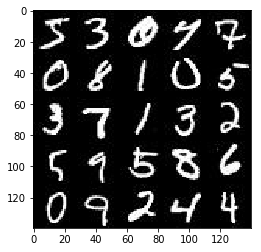

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot



mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

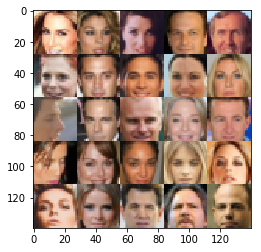

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0


C:\Users\Nandhini\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [71]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    input = tf.placeholder(tf.float32, [None,image_width, image_height,image_channels], name = "input")
    input_z = tf.placeholder(tf.float32, [None, z_dim], name = "input_z")
    learning_rate = tf.placeholder(tf.float32, name = "learning_rate")

    return input, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [238]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
   
    alpha = 0.2

    with tf.variable_scope('discriminator', reuse = reuse):
        
         
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        x1 = tf.maximum(alpha*x1, x1)
         
                 
        x2 = tf.layers.conv2d(x1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha*bn2, bn2)
         
        
        x3 = tf.layers.conv2d(x2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(alpha*bn3, bn3)
         

        # Flatten it
        flat = tf.reshape(x3, (-1, 4*4*256))
         
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [239]:
def generator(z, out_channel_dim, is_train= True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2 
    with tf.variable_scope('generator' , reuse = not is_train):
         
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*128)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7,128))
         
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha*x1, x1)
        
        x2 = tf.layers.conv2d_transpose(x1, 64, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training = is_train)
        x2 = tf.maximum(alpha*x2, x2)
        
   
        
        x3 = tf.layers.conv2d_transpose(x2, 16, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training= is_train)
        x3 = tf.maximum(alpha*x3, x3)
        
                   
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides = 1, padding='same')
        out = tf.tanh(logits)
       
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [276]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    smooth = 0.9
    
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*(1-smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [277]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)


    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [278]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [279]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
     
    image_width = data_shape[1]
    image_height = data_shape[2]
    image_channels = data_shape[3]
    input_real, input_z, learningrate = model_inputs(image_width, image_height, image_channels, z_dim)
    d_loss, g_loss      = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt        = model_opt(d_loss, g_loss, learning_rate, beta1)
               
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps += 1
                
                batch_images = batch_images * 2
                
                # TODO: Train Model
               # Sample random noise for G
                input_fake = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real:batch_images, input_z : input_fake})
                          
                _ = sess.run(g_opt, feed_dict={input_real:batch_images,input_z: input_fake})         
                
            
                if steps % 100 == 0:
                    show_generator_output(sess, 20, input_z, data_shape[3], data_image_mode)
                
                if steps % 10 == 0:

                    train_loss_d = d_loss.eval({input_z:input_fake, input_real:batch_images, })
                    train_loss_g = g_loss.eval({input_z:input_fake})

                    print("Epoch {}/{} ".format(epoch_i+1, epoch_count),
                         "Discriminator Loss: {:.4f}".format(train_loss_d),
                         "Generator Loss: {:.4f}".format(train_loss_g))

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2  Discriminator Loss: 1.0369 Generator Loss: 1.1088
Epoch 1/2  Discriminator Loss: 0.8665 Generator Loss: 1.1232
Epoch 1/2  Discriminator Loss: 0.6499 Generator Loss: 6.2486
Epoch 1/2  Discriminator Loss: 0.4628 Generator Loss: 2.2659
Epoch 1/2  Discriminator Loss: 0.4384 Generator Loss: 2.5629
Epoch 1/2  Discriminator Loss: 0.4084 Generator Loss: 3.3428
Epoch 1/2  Discriminator Loss: 0.4292 Generator Loss: 2.7954
Epoch 1/2  Discriminator Loss: 0.5865 Generator Loss: 5.5147
Epoch 1/2  Discriminator Loss: 0.4392 Generator Loss: 2.3971


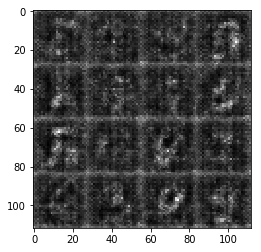

Epoch 1/2  Discriminator Loss: 0.4016 Generator Loss: 2.7922
Epoch 1/2  Discriminator Loss: 0.4492 Generator Loss: 2.3307
Epoch 1/2  Discriminator Loss: 0.4335 Generator Loss: 2.3902
Epoch 1/2  Discriminator Loss: 0.4312 Generator Loss: 2.4654
Epoch 1/2  Discriminator Loss: 0.4278 Generator Loss: 2.5047
Epoch 1/2  Discriminator Loss: 0.4319 Generator Loss: 2.4518
Epoch 1/2  Discriminator Loss: 0.4195 Generator Loss: 2.4959
Epoch 1/2  Discriminator Loss: 0.4163 Generator Loss: 2.7588
Epoch 1/2  Discriminator Loss: 0.3822 Generator Loss: 3.2294
Epoch 1/2  Discriminator Loss: 0.4144 Generator Loss: 4.0188


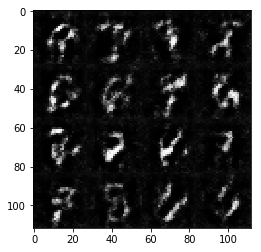

Epoch 1/2  Discriminator Loss: 0.4447 Generator Loss: 4.2612
Epoch 1/2  Discriminator Loss: 0.4234 Generator Loss: 2.5310
Epoch 1/2  Discriminator Loss: 0.4014 Generator Loss: 2.8185
Epoch 1/2  Discriminator Loss: 0.4227 Generator Loss: 2.7199
Epoch 1/2  Discriminator Loss: 0.4088 Generator Loss: 3.1094
Epoch 1/2  Discriminator Loss: 0.3915 Generator Loss: 3.5755
Epoch 1/2  Discriminator Loss: 0.3948 Generator Loss: 2.8829
Epoch 1/2  Discriminator Loss: 0.4258 Generator Loss: 4.4380
Epoch 1/2  Discriminator Loss: 0.3859 Generator Loss: 3.6723
Epoch 1/2  Discriminator Loss: 0.3827 Generator Loss: 3.4309


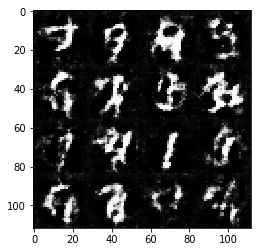

Epoch 1/2  Discriminator Loss: 0.4520 Generator Loss: 2.3893
Epoch 1/2  Discriminator Loss: 0.3960 Generator Loss: 3.8810
Epoch 1/2  Discriminator Loss: 0.4360 Generator Loss: 2.5383
Epoch 1/2  Discriminator Loss: 0.4229 Generator Loss: 2.5750
Epoch 1/2  Discriminator Loss: 0.4324 Generator Loss: 2.4932
Epoch 1/2  Discriminator Loss: 0.4043 Generator Loss: 3.0002
Epoch 1/2  Discriminator Loss: 0.3801 Generator Loss: 3.3501
Epoch 1/2  Discriminator Loss: 0.3784 Generator Loss: 3.1072
Epoch 1/2  Discriminator Loss: 0.4349 Generator Loss: 2.6080
Epoch 1/2  Discriminator Loss: 0.3761 Generator Loss: 3.5199


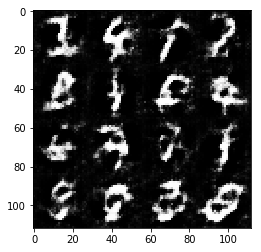

Epoch 1/2  Discriminator Loss: 0.4557 Generator Loss: 2.4223
Epoch 1/2  Discriminator Loss: 0.3974 Generator Loss: 2.8201
Epoch 1/2  Discriminator Loss: 0.4051 Generator Loss: 2.8789
Epoch 1/2  Discriminator Loss: 0.4320 Generator Loss: 2.4671
Epoch 1/2  Discriminator Loss: 0.4168 Generator Loss: 2.6040
Epoch 1/2  Discriminator Loss: 0.3812 Generator Loss: 3.0850
Epoch 1/2  Discriminator Loss: 0.3823 Generator Loss: 3.1757
Epoch 1/2  Discriminator Loss: 0.3809 Generator Loss: 3.2517
Epoch 1/2  Discriminator Loss: 0.3978 Generator Loss: 3.4980
Epoch 1/2  Discriminator Loss: 0.3976 Generator Loss: 2.8276


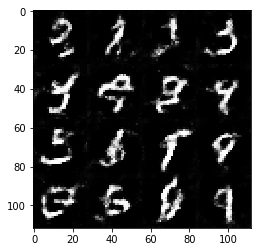

Epoch 1/2  Discriminator Loss: 0.4094 Generator Loss: 2.6311
Epoch 1/2  Discriminator Loss: 0.4383 Generator Loss: 2.4764
Epoch 1/2  Discriminator Loss: 0.4452 Generator Loss: 2.3300
Epoch 1/2  Discriminator Loss: 0.4032 Generator Loss: 3.7651
Epoch 1/2  Discriminator Loss: 0.3852 Generator Loss: 3.2826
Epoch 1/2  Discriminator Loss: 0.4238 Generator Loss: 4.0158
Epoch 1/2  Discriminator Loss: 0.3886 Generator Loss: 3.1304
Epoch 1/2  Discriminator Loss: 0.3934 Generator Loss: 3.6698
Epoch 1/2  Discriminator Loss: 0.3822 Generator Loss: 3.2261
Epoch 1/2  Discriminator Loss: 0.4236 Generator Loss: 4.3038


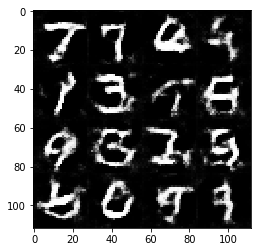

Epoch 1/2  Discriminator Loss: 0.3852 Generator Loss: 3.0463
Epoch 1/2  Discriminator Loss: 0.3927 Generator Loss: 3.1927
Epoch 1/2  Discriminator Loss: 0.3817 Generator Loss: 3.4415
Epoch 1/2  Discriminator Loss: 0.3898 Generator Loss: 3.4048
Epoch 1/2  Discriminator Loss: 0.4066 Generator Loss: 4.1450
Epoch 1/2  Discriminator Loss: 0.4000 Generator Loss: 2.7667
Epoch 1/2  Discriminator Loss: 0.3758 Generator Loss: 3.2292
Epoch 1/2  Discriminator Loss: 0.4039 Generator Loss: 3.7794
Epoch 1/2  Discriminator Loss: 0.3965 Generator Loss: 3.9320
Epoch 1/2  Discriminator Loss: 0.4258 Generator Loss: 2.4935


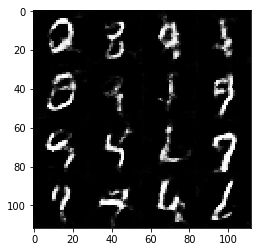

Epoch 1/2  Discriminator Loss: 0.4291 Generator Loss: 2.6422
Epoch 1/2  Discriminator Loss: 0.4162 Generator Loss: 2.5866
Epoch 1/2  Discriminator Loss: 0.3917 Generator Loss: 3.4678
Epoch 1/2  Discriminator Loss: 0.4409 Generator Loss: 4.2915
Epoch 1/2  Discriminator Loss: 0.3809 Generator Loss: 3.2713
Epoch 1/2  Discriminator Loss: 0.4248 Generator Loss: 4.3205
Epoch 1/2  Discriminator Loss: 0.6214 Generator Loss: 6.1181
Epoch 1/2  Discriminator Loss: 0.4152 Generator Loss: 2.7977
Epoch 1/2  Discriminator Loss: 0.4169 Generator Loss: 2.6271
Epoch 1/2  Discriminator Loss: 0.3965 Generator Loss: 2.8376


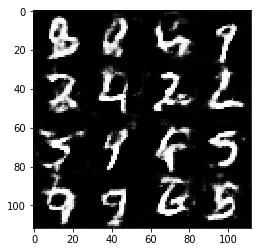

Epoch 1/2  Discriminator Loss: 0.3935 Generator Loss: 2.9340
Epoch 1/2  Discriminator Loss: 0.3814 Generator Loss: 3.1677
Epoch 1/2  Discriminator Loss: 0.4086 Generator Loss: 2.6167
Epoch 1/2  Discriminator Loss: 0.4244 Generator Loss: 2.5605
Epoch 1/2  Discriminator Loss: 0.3831 Generator Loss: 3.5626
Epoch 1/2  Discriminator Loss: 0.3772 Generator Loss: 3.2763
Epoch 1/2  Discriminator Loss: 0.4017 Generator Loss: 2.7428
Epoch 1/2  Discriminator Loss: 0.4319 Generator Loss: 2.5152
Epoch 1/2  Discriminator Loss: 0.3868 Generator Loss: 3.0969
Epoch 1/2  Discriminator Loss: 0.4155 Generator Loss: 2.6336


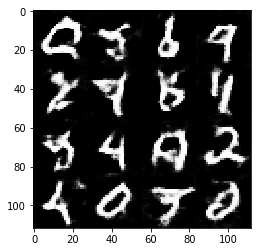

Epoch 1/2  Discriminator Loss: 0.3981 Generator Loss: 2.8908
Epoch 1/2  Discriminator Loss: 0.3839 Generator Loss: 3.1033
Epoch 1/2  Discriminator Loss: 0.4165 Generator Loss: 2.6268
Epoch 1/2  Discriminator Loss: 0.4229 Generator Loss: 2.5512
Epoch 1/2  Discriminator Loss: 0.3878 Generator Loss: 3.0128
Epoch 1/2  Discriminator Loss: 0.3775 Generator Loss: 3.3445
Epoch 1/2  Discriminator Loss: 0.4139 Generator Loss: 3.9557
Epoch 1/2  Discriminator Loss: 0.4188 Generator Loss: 2.6348
Epoch 1/2  Discriminator Loss: 0.3925 Generator Loss: 2.8505
Epoch 1/2  Discriminator Loss: 0.4054 Generator Loss: 2.6962


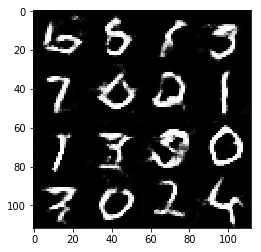

Epoch 1/2  Discriminator Loss: 0.4309 Generator Loss: 2.4981
Epoch 1/2  Discriminator Loss: 0.3934 Generator Loss: 2.8454
Epoch 1/2  Discriminator Loss: 0.3814 Generator Loss: 3.2546
Epoch 1/2  Discriminator Loss: 0.4508 Generator Loss: 2.6343
Epoch 1/2  Discriminator Loss: 0.4057 Generator Loss: 2.6596
Epoch 1/2  Discriminator Loss: 0.3741 Generator Loss: 3.2009
Epoch 1/2  Discriminator Loss: 0.4214 Generator Loss: 4.3566
Epoch 1/2  Discriminator Loss: 0.3864 Generator Loss: 3.2460
Epoch 1/2  Discriminator Loss: 0.3805 Generator Loss: 3.1870
Epoch 1/2  Discriminator Loss: 0.4917 Generator Loss: 4.8305


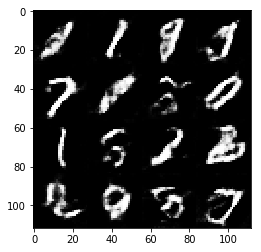

Epoch 1/2  Discriminator Loss: 0.4017 Generator Loss: 2.7280
Epoch 1/2  Discriminator Loss: 0.4012 Generator Loss: 2.7574
Epoch 1/2  Discriminator Loss: 0.4087 Generator Loss: 2.6642
Epoch 1/2  Discriminator Loss: 0.3905 Generator Loss: 2.8870
Epoch 1/2  Discriminator Loss: 0.4193 Generator Loss: 2.6649
Epoch 1/2  Discriminator Loss: 0.4105 Generator Loss: 2.5986
Epoch 1/2  Discriminator Loss: 0.3864 Generator Loss: 3.8294
Epoch 1/2  Discriminator Loss: 0.3910 Generator Loss: 3.5714
Epoch 1/2  Discriminator Loss: 0.3774 Generator Loss: 3.2168
Epoch 1/2  Discriminator Loss: 0.3823 Generator Loss: 3.2625


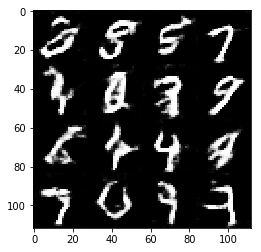

Epoch 1/2  Discriminator Loss: 0.3758 Generator Loss: 3.1759
Epoch 1/2  Discriminator Loss: 0.4434 Generator Loss: 2.5098
Epoch 1/2  Discriminator Loss: 0.3805 Generator Loss: 3.4604
Epoch 1/2  Discriminator Loss: 0.3862 Generator Loss: 2.9802
Epoch 1/2  Discriminator Loss: 0.4047 Generator Loss: 2.7998
Epoch 1/2  Discriminator Loss: 0.3824 Generator Loss: 3.4860
Epoch 1/2  Discriminator Loss: 0.3833 Generator Loss: 3.4367
Epoch 1/2  Discriminator Loss: 0.3938 Generator Loss: 3.5328
Epoch 1/2  Discriminator Loss: 0.4361 Generator Loss: 2.5260
Epoch 1/2  Discriminator Loss: 0.3931 Generator Loss: 3.5077


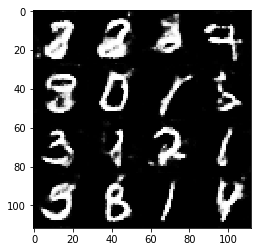

Epoch 1/2  Discriminator Loss: 0.3764 Generator Loss: 3.4460
Epoch 1/2  Discriminator Loss: 0.3809 Generator Loss: 3.0581
Epoch 1/2  Discriminator Loss: 0.3955 Generator Loss: 2.8701
Epoch 1/2  Discriminator Loss: 0.5952 Generator Loss: 5.8849
Epoch 1/2  Discriminator Loss: 0.3811 Generator Loss: 3.3416
Epoch 1/2  Discriminator Loss: 0.3859 Generator Loss: 2.9639
Epoch 1/2  Discriminator Loss: 0.4136 Generator Loss: 2.6170
Epoch 1/2  Discriminator Loss: 0.3916 Generator Loss: 3.1925
Epoch 1/2  Discriminator Loss: 0.3856 Generator Loss: 3.3552
Epoch 1/2  Discriminator Loss: 0.4089 Generator Loss: 2.7864


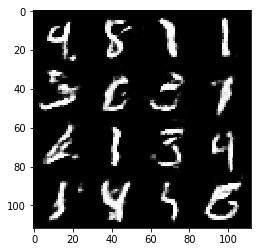

Epoch 1/2  Discriminator Loss: 0.3904 Generator Loss: 3.0177
Epoch 1/2  Discriminator Loss: 0.4082 Generator Loss: 2.7468
Epoch 1/2  Discriminator Loss: 0.4503 Generator Loss: 2.4490
Epoch 1/2  Discriminator Loss: 0.3837 Generator Loss: 3.2192
Epoch 1/2  Discriminator Loss: 0.3861 Generator Loss: 3.5141
Epoch 1/2  Discriminator Loss: 0.4179 Generator Loss: 2.6049
Epoch 1/2  Discriminator Loss: 0.3951 Generator Loss: 3.9082
Epoch 1/2  Discriminator Loss: 0.4275 Generator Loss: 2.4919
Epoch 1/2  Discriminator Loss: 0.3804 Generator Loss: 3.2687
Epoch 1/2  Discriminator Loss: 0.4291 Generator Loss: 2.4388


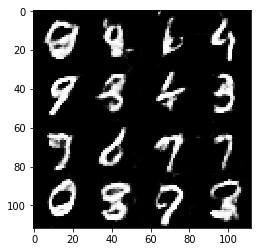

Epoch 1/2  Discriminator Loss: 0.3850 Generator Loss: 3.1423
Epoch 1/2  Discriminator Loss: 0.4143 Generator Loss: 2.6618
Epoch 1/2  Discriminator Loss: 0.4070 Generator Loss: 2.8272
Epoch 1/2  Discriminator Loss: 0.4142 Generator Loss: 2.7553
Epoch 1/2  Discriminator Loss: 0.3860 Generator Loss: 3.4674
Epoch 1/2  Discriminator Loss: 0.3904 Generator Loss: 3.5703
Epoch 1/2  Discriminator Loss: 0.3917 Generator Loss: 3.7292
Epoch 1/2  Discriminator Loss: 0.3813 Generator Loss: 3.1177
Epoch 1/2  Discriminator Loss: 0.4111 Generator Loss: 2.6449
Epoch 1/2  Discriminator Loss: 0.3874 Generator Loss: 3.9667


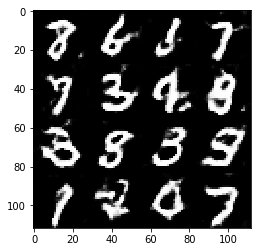

Epoch 1/2  Discriminator Loss: 0.4166 Generator Loss: 2.6014
Epoch 1/2  Discriminator Loss: 0.4085 Generator Loss: 2.7414
Epoch 1/2  Discriminator Loss: 0.4075 Generator Loss: 2.7617
Epoch 1/2  Discriminator Loss: 0.3832 Generator Loss: 3.5671
Epoch 1/2  Discriminator Loss: 0.3780 Generator Loss: 3.4176
Epoch 1/2  Discriminator Loss: 0.3689 Generator Loss: 3.2777
Epoch 1/2  Discriminator Loss: 0.3998 Generator Loss: 2.7789
Epoch 1/2  Discriminator Loss: 0.3999 Generator Loss: 4.0004
Epoch 1/2  Discriminator Loss: 0.4265 Generator Loss: 4.4001
Epoch 1/2  Discriminator Loss: 0.3728 Generator Loss: 3.2492


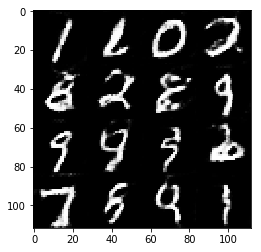

Epoch 1/2  Discriminator Loss: 0.3875 Generator Loss: 2.9857
Epoch 1/2  Discriminator Loss: 0.3692 Generator Loss: 3.2578
Epoch 1/2  Discriminator Loss: 0.4318 Generator Loss: 3.8002
Epoch 1/2  Discriminator Loss: 0.3775 Generator Loss: 3.1928
Epoch 1/2  Discriminator Loss: 0.3904 Generator Loss: 3.3346
Epoch 1/2  Discriminator Loss: 0.3784 Generator Loss: 3.4722
Epoch 1/2  Discriminator Loss: 0.3936 Generator Loss: 2.8813
Epoch 1/2  Discriminator Loss: 0.3879 Generator Loss: 3.5154
Epoch 1/2  Discriminator Loss: 0.3802 Generator Loss: 3.8142
Epoch 1/2  Discriminator Loss: 0.3673 Generator Loss: 3.3893


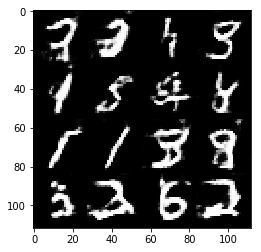

Epoch 1/2  Discriminator Loss: 0.3950 Generator Loss: 3.9382
Epoch 1/2  Discriminator Loss: 0.3853 Generator Loss: 3.2166
Epoch 1/2  Discriminator Loss: 0.3851 Generator Loss: 3.6148
Epoch 1/2  Discriminator Loss: 0.4257 Generator Loss: 4.0878
Epoch 1/2  Discriminator Loss: 0.3741 Generator Loss: 3.3277
Epoch 1/2  Discriminator Loss: 0.3972 Generator Loss: 2.8171
Epoch 1/2  Discriminator Loss: 0.3990 Generator Loss: 2.7857
Epoch 1/2  Discriminator Loss: 0.3850 Generator Loss: 3.0393
Epoch 2/2  Discriminator Loss: 0.3774 Generator Loss: 3.7575
Epoch 2/2  Discriminator Loss: 0.4109 Generator Loss: 3.9625


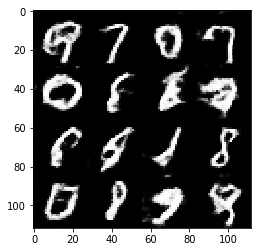

Epoch 2/2  Discriminator Loss: 0.3841 Generator Loss: 3.0059
Epoch 2/2  Discriminator Loss: 0.4067 Generator Loss: 2.7067
Epoch 2/2  Discriminator Loss: 0.3883 Generator Loss: 3.0381
Epoch 2/2  Discriminator Loss: 0.3889 Generator Loss: 3.3638
Epoch 2/2  Discriminator Loss: 0.3985 Generator Loss: 3.6016
Epoch 2/2  Discriminator Loss: 0.3890 Generator Loss: 2.8584
Epoch 2/2  Discriminator Loss: 0.4134 Generator Loss: 2.6224
Epoch 2/2  Discriminator Loss: 0.3903 Generator Loss: 2.8605
Epoch 2/2  Discriminator Loss: 0.3977 Generator Loss: 2.8296
Epoch 2/2  Discriminator Loss: 0.3733 Generator Loss: 3.2291


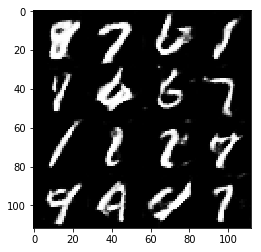

Epoch 2/2  Discriminator Loss: 0.3886 Generator Loss: 3.8797
Epoch 2/2  Discriminator Loss: 0.3740 Generator Loss: 3.4941
Epoch 2/2  Discriminator Loss: 0.3680 Generator Loss: 3.4406
Epoch 2/2  Discriminator Loss: 0.3785 Generator Loss: 3.1812
Epoch 2/2  Discriminator Loss: 0.4080 Generator Loss: 2.8633
Epoch 2/2  Discriminator Loss: 0.3978 Generator Loss: 2.8143
Epoch 2/2  Discriminator Loss: 0.3711 Generator Loss: 3.1953
Epoch 2/2  Discriminator Loss: 0.3712 Generator Loss: 3.8504
Epoch 2/2  Discriminator Loss: 0.4154 Generator Loss: 3.9462
Epoch 2/2  Discriminator Loss: 0.3897 Generator Loss: 2.8773


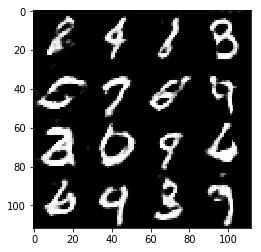

Epoch 2/2  Discriminator Loss: 0.4045 Generator Loss: 3.9925
Epoch 2/2  Discriminator Loss: 0.4045 Generator Loss: 2.8022
Epoch 2/2  Discriminator Loss: 0.3736 Generator Loss: 3.1915
Epoch 2/2  Discriminator Loss: 0.4017 Generator Loss: 2.8041
Epoch 2/2  Discriminator Loss: 0.3755 Generator Loss: 4.0393
Epoch 2/2  Discriminator Loss: 0.3873 Generator Loss: 2.9568
Epoch 2/2  Discriminator Loss: 0.4017 Generator Loss: 2.7869
Epoch 2/2  Discriminator Loss: 0.3851 Generator Loss: 2.9947
Epoch 2/2  Discriminator Loss: 0.3821 Generator Loss: 3.0671
Epoch 2/2  Discriminator Loss: 0.3681 Generator Loss: 3.6969


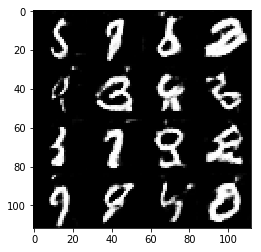

Epoch 2/2  Discriminator Loss: 0.3731 Generator Loss: 3.2439
Epoch 2/2  Discriminator Loss: 0.3790 Generator Loss: 3.4326
Epoch 2/2  Discriminator Loss: 0.3969 Generator Loss: 4.1065
Epoch 2/2  Discriminator Loss: 0.3911 Generator Loss: 2.8763
Epoch 2/2  Discriminator Loss: 0.3710 Generator Loss: 3.7283
Epoch 2/2  Discriminator Loss: 0.3770 Generator Loss: 3.1246
Epoch 2/2  Discriminator Loss: 0.3762 Generator Loss: 3.6495
Epoch 2/2  Discriminator Loss: 0.3747 Generator Loss: 3.1766
Epoch 2/2  Discriminator Loss: 0.3729 Generator Loss: 3.7006
Epoch 2/2  Discriminator Loss: 0.4234 Generator Loss: 4.2891


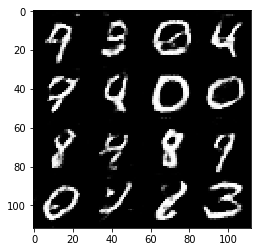

Epoch 2/2  Discriminator Loss: 0.3737 Generator Loss: 3.3938
Epoch 2/2  Discriminator Loss: 0.4067 Generator Loss: 2.7171
Epoch 2/2  Discriminator Loss: 0.3863 Generator Loss: 2.9441
Epoch 2/2  Discriminator Loss: 0.4065 Generator Loss: 2.8200
Epoch 2/2  Discriminator Loss: 0.3949 Generator Loss: 3.8267
Epoch 2/2  Discriminator Loss: 0.4562 Generator Loss: 4.8618
Epoch 2/2  Discriminator Loss: 0.3749 Generator Loss: 3.4577
Epoch 2/2  Discriminator Loss: 0.3720 Generator Loss: 3.3626
Epoch 2/2  Discriminator Loss: 0.3735 Generator Loss: 3.1560
Epoch 2/2  Discriminator Loss: 0.3774 Generator Loss: 3.5823


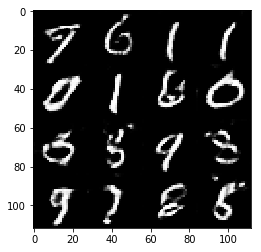

Epoch 2/2  Discriminator Loss: 0.4045 Generator Loss: 2.8742
Epoch 2/2  Discriminator Loss: 0.3976 Generator Loss: 3.4872
Epoch 2/2  Discriminator Loss: 0.4095 Generator Loss: 2.7629
Epoch 2/2  Discriminator Loss: 0.3651 Generator Loss: 3.5578
Epoch 2/2  Discriminator Loss: 0.3817 Generator Loss: 3.0169
Epoch 2/2  Discriminator Loss: 0.3873 Generator Loss: 3.0082
Epoch 2/2  Discriminator Loss: 0.4091 Generator Loss: 2.6946
Epoch 2/2  Discriminator Loss: 0.4113 Generator Loss: 2.6917
Epoch 2/2  Discriminator Loss: 0.3879 Generator Loss: 3.9006
Epoch 2/2  Discriminator Loss: 0.3676 Generator Loss: 3.5478


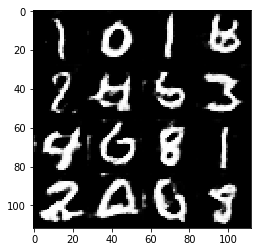

Epoch 2/2  Discriminator Loss: 0.4066 Generator Loss: 2.6934
Epoch 2/2  Discriminator Loss: 0.3983 Generator Loss: 3.3373
Epoch 2/2  Discriminator Loss: 0.3708 Generator Loss: 3.6411
Epoch 2/2  Discriminator Loss: 0.3981 Generator Loss: 2.7449
Epoch 2/2  Discriminator Loss: 0.3724 Generator Loss: 3.2894
Epoch 2/2  Discriminator Loss: 0.3805 Generator Loss: 3.1346
Epoch 2/2  Discriminator Loss: 0.3967 Generator Loss: 2.8272
Epoch 2/2  Discriminator Loss: 0.3676 Generator Loss: 3.5860
Epoch 2/2  Discriminator Loss: 0.4290 Generator Loss: 4.7476
Epoch 2/2  Discriminator Loss: 0.3800 Generator Loss: 3.0318


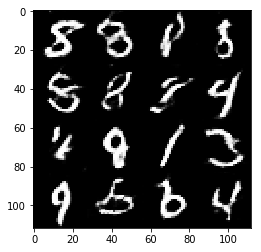

Epoch 2/2  Discriminator Loss: 0.4004 Generator Loss: 2.8617
Epoch 2/2  Discriminator Loss: 0.3961 Generator Loss: 4.0938
Epoch 2/2  Discriminator Loss: 0.4293 Generator Loss: 4.3196
Epoch 2/2  Discriminator Loss: 0.3674 Generator Loss: 3.4563
Epoch 2/2  Discriminator Loss: 0.3788 Generator Loss: 3.0978
Epoch 2/2  Discriminator Loss: 0.3847 Generator Loss: 3.5346
Epoch 2/2  Discriminator Loss: 0.3876 Generator Loss: 2.9025
Epoch 2/2  Discriminator Loss: 0.3707 Generator Loss: 3.2499
Epoch 2/2  Discriminator Loss: 0.3622 Generator Loss: 3.7971
Epoch 2/2  Discriminator Loss: 0.3548 Generator Loss: 3.7504


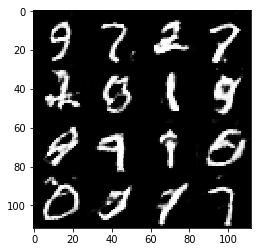

Epoch 2/2  Discriminator Loss: 0.3756 Generator Loss: 3.2194
Epoch 2/2  Discriminator Loss: 0.4604 Generator Loss: 4.8872
Epoch 2/2  Discriminator Loss: 0.3742 Generator Loss: 3.2617
Epoch 2/2  Discriminator Loss: 0.4091 Generator Loss: 2.7047
Epoch 2/2  Discriminator Loss: 0.4131 Generator Loss: 2.7311
Epoch 2/2  Discriminator Loss: 0.4013 Generator Loss: 3.0562
Epoch 2/2  Discriminator Loss: 0.3730 Generator Loss: 3.2353
Epoch 2/2  Discriminator Loss: 0.4147 Generator Loss: 2.8182
Epoch 2/2  Discriminator Loss: 0.3902 Generator Loss: 2.9619
Epoch 2/2  Discriminator Loss: 0.3821 Generator Loss: 3.3526


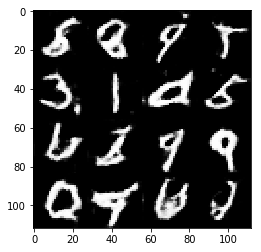

Epoch 2/2  Discriminator Loss: 0.3825 Generator Loss: 3.0265
Epoch 2/2  Discriminator Loss: 0.3834 Generator Loss: 4.1051
Epoch 2/2  Discriminator Loss: 0.3666 Generator Loss: 3.8184
Epoch 2/2  Discriminator Loss: 0.4294 Generator Loss: 2.9360
Epoch 2/2  Discriminator Loss: 0.3752 Generator Loss: 3.1098
Epoch 2/2  Discriminator Loss: 0.3750 Generator Loss: 3.4987
Epoch 2/2  Discriminator Loss: 0.3754 Generator Loss: 3.4015
Epoch 2/2  Discriminator Loss: 0.3799 Generator Loss: 3.7550
Epoch 2/2  Discriminator Loss: 0.3643 Generator Loss: 3.4261
Epoch 2/2  Discriminator Loss: 0.3621 Generator Loss: 3.4911


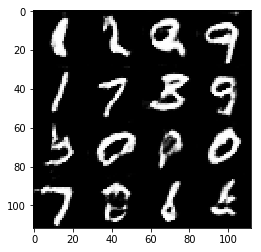

Epoch 2/2  Discriminator Loss: 0.4386 Generator Loss: 4.6002
Epoch 2/2  Discriminator Loss: 0.3921 Generator Loss: 4.4727
Epoch 2/2  Discriminator Loss: 0.3710 Generator Loss: 3.5915
Epoch 2/2  Discriminator Loss: 0.3965 Generator Loss: 3.0886
Epoch 2/2  Discriminator Loss: 0.3775 Generator Loss: 3.3728
Epoch 2/2  Discriminator Loss: 0.4411 Generator Loss: 4.6528
Epoch 2/2  Discriminator Loss: 0.4110 Generator Loss: 4.0872
Epoch 2/2  Discriminator Loss: 0.3638 Generator Loss: 3.3721
Epoch 2/2  Discriminator Loss: 0.3855 Generator Loss: 3.0873
Epoch 2/2  Discriminator Loss: 0.3705 Generator Loss: 3.8480


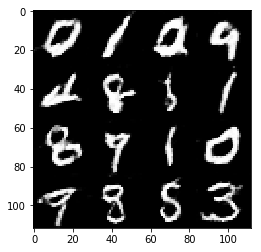

Epoch 2/2  Discriminator Loss: 0.4352 Generator Loss: 4.2956
Epoch 2/2  Discriminator Loss: 0.3766 Generator Loss: 3.1281
Epoch 2/2  Discriminator Loss: 0.3849 Generator Loss: 3.0161
Epoch 2/2  Discriminator Loss: 0.3710 Generator Loss: 3.2193
Epoch 2/2  Discriminator Loss: 0.3718 Generator Loss: 3.2130
Epoch 2/2  Discriminator Loss: 0.3960 Generator Loss: 4.1018
Epoch 2/2  Discriminator Loss: 0.3951 Generator Loss: 3.1919
Epoch 2/2  Discriminator Loss: 0.3512 Generator Loss: 3.9512
Epoch 2/2  Discriminator Loss: 0.3913 Generator Loss: 2.9061
Epoch 2/2  Discriminator Loss: 0.3795 Generator Loss: 3.1633


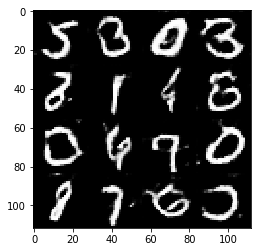

Epoch 2/2  Discriminator Loss: 0.3778 Generator Loss: 3.3887
Epoch 2/2  Discriminator Loss: 0.4032 Generator Loss: 4.3641
Epoch 2/2  Discriminator Loss: 0.3787 Generator Loss: 3.2081
Epoch 2/2  Discriminator Loss: 0.3801 Generator Loss: 3.1758
Epoch 2/2  Discriminator Loss: 0.3772 Generator Loss: 3.4684
Epoch 2/2  Discriminator Loss: 0.3723 Generator Loss: 3.2595
Epoch 2/2  Discriminator Loss: 0.3657 Generator Loss: 3.7283
Epoch 2/2  Discriminator Loss: 0.3767 Generator Loss: 3.4914
Epoch 2/2  Discriminator Loss: 0.4107 Generator Loss: 4.0913
Epoch 2/2  Discriminator Loss: 0.3885 Generator Loss: 2.9015


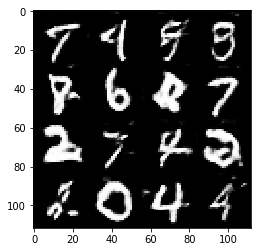

Epoch 2/2  Discriminator Loss: 0.3679 Generator Loss: 3.6799
Epoch 2/2  Discriminator Loss: 0.3664 Generator Loss: 3.4966
Epoch 2/2  Discriminator Loss: 0.3851 Generator Loss: 3.8949
Epoch 2/2  Discriminator Loss: 0.4021 Generator Loss: 2.8674
Epoch 2/2  Discriminator Loss: 0.4315 Generator Loss: 4.2833
Epoch 2/2  Discriminator Loss: 0.3892 Generator Loss: 3.1264
Epoch 2/2  Discriminator Loss: 0.3980 Generator Loss: 3.0357
Epoch 2/2  Discriminator Loss: 0.4242 Generator Loss: 2.9041
Epoch 2/2  Discriminator Loss: 0.3705 Generator Loss: 3.3227
Epoch 2/2  Discriminator Loss: 0.3669 Generator Loss: 3.3493


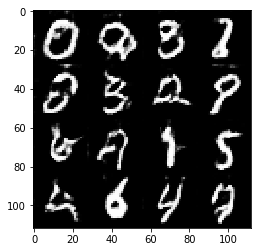

Epoch 2/2  Discriminator Loss: 0.3926 Generator Loss: 2.9995
Epoch 2/2  Discriminator Loss: 0.3871 Generator Loss: 3.0174
Epoch 2/2  Discriminator Loss: 0.3874 Generator Loss: 3.0266
Epoch 2/2  Discriminator Loss: 0.3954 Generator Loss: 3.0335
Epoch 2/2  Discriminator Loss: 0.3640 Generator Loss: 3.4278
Epoch 2/2  Discriminator Loss: 0.3692 Generator Loss: 3.4736
Epoch 2/2  Discriminator Loss: 0.3711 Generator Loss: 3.5127
Epoch 2/2  Discriminator Loss: 0.3821 Generator Loss: 3.3159
Epoch 2/2  Discriminator Loss: 0.3779 Generator Loss: 3.0913
Epoch 2/2  Discriminator Loss: 0.3823 Generator Loss: 3.1388


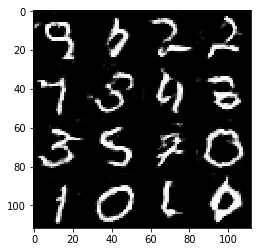

Epoch 2/2  Discriminator Loss: 0.3939 Generator Loss: 2.9190
Epoch 2/2  Discriminator Loss: 0.3994 Generator Loss: 2.9284
Epoch 2/2  Discriminator Loss: 0.3944 Generator Loss: 4.3448
Epoch 2/2  Discriminator Loss: 0.3614 Generator Loss: 3.7328
Epoch 2/2  Discriminator Loss: 0.3822 Generator Loss: 3.0438
Epoch 2/2  Discriminator Loss: 0.3827 Generator Loss: 3.0736
Epoch 2/2  Discriminator Loss: 0.3760 Generator Loss: 3.6553
Epoch 2/2  Discriminator Loss: 0.3818 Generator Loss: 3.1885
Epoch 2/2  Discriminator Loss: 0.3640 Generator Loss: 3.3240
Epoch 2/2  Discriminator Loss: 0.3731 Generator Loss: 3.4248


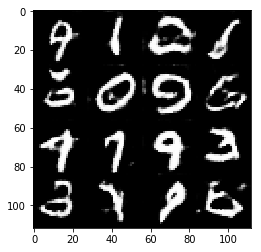

Epoch 2/2  Discriminator Loss: 0.3897 Generator Loss: 3.0353
Epoch 2/2  Discriminator Loss: 0.3603 Generator Loss: 3.4937
Epoch 2/2  Discriminator Loss: 0.3725 Generator Loss: 3.2135
Epoch 2/2  Discriminator Loss: 0.3702 Generator Loss: 3.3273
Epoch 2/2  Discriminator Loss: 0.3719 Generator Loss: 3.8735
Epoch 2/2  Discriminator Loss: 0.3566 Generator Loss: 3.6175
Epoch 2/2  Discriminator Loss: 0.3691 Generator Loss: 3.8115
Epoch 2/2  Discriminator Loss: 0.3856 Generator Loss: 3.0624
Epoch 2/2  Discriminator Loss: 0.4278 Generator Loss: 4.7625
Epoch 2/2  Discriminator Loss: 0.5303 Generator Loss: 2.3776


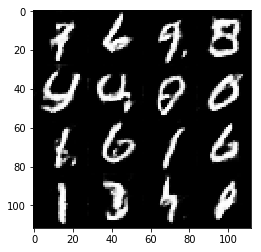

Epoch 2/2  Discriminator Loss: 0.3828 Generator Loss: 3.0596
Epoch 2/2  Discriminator Loss: 0.3767 Generator Loss: 3.3057
Epoch 2/2  Discriminator Loss: 0.3861 Generator Loss: 3.7044
Epoch 2/2  Discriminator Loss: 0.3606 Generator Loss: 3.5434
Epoch 2/2  Discriminator Loss: 0.4095 Generator Loss: 2.6809
Epoch 2/2  Discriminator Loss: 0.3535 Generator Loss: 3.8967
Epoch 2/2  Discriminator Loss: 0.3654 Generator Loss: 3.5202
Epoch 2/2  Discriminator Loss: 0.3797 Generator Loss: 3.9335
Epoch 2/2  Discriminator Loss: 0.3795 Generator Loss: 3.0763
Epoch 2/2  Discriminator Loss: 0.3618 Generator Loss: 3.5119


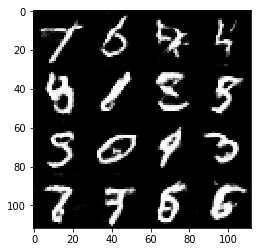

Epoch 2/2  Discriminator Loss: 0.3797 Generator Loss: 3.7761
Epoch 2/2  Discriminator Loss: 0.4074 Generator Loss: 4.3757
Epoch 2/2  Discriminator Loss: 0.3655 Generator Loss: 3.5984
Epoch 2/2  Discriminator Loss: 0.4207 Generator Loss: 4.3588
Epoch 2/2  Discriminator Loss: 0.3847 Generator Loss: 3.1491
Epoch 2/2  Discriminator Loss: 0.3851 Generator Loss: 3.2219


In [282]:
batch_size = 32
z_dim = 100
learning_rate = 0.0005
beta1 = 0.2


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1  Discriminator Loss: 0.5666 Generator Loss: 2.9580
Epoch 1/1  Discriminator Loss: 0.4047 Generator Loss: 3.4561
Epoch 1/1  Discriminator Loss: 0.3844 Generator Loss: 3.2960
Epoch 1/1  Discriminator Loss: 0.3883 Generator Loss: 4.1612
Epoch 1/1  Discriminator Loss: 0.4063 Generator Loss: 4.5134
Epoch 1/1  Discriminator Loss: 0.3998 Generator Loss: 2.9118
Epoch 1/1  Discriminator Loss: 0.4306 Generator Loss: 4.5450
Epoch 1/1  Discriminator Loss: 0.4185 Generator Loss: 2.6225
Epoch 1/1  Discriminator Loss: 0.4052 Generator Loss: 3.2635


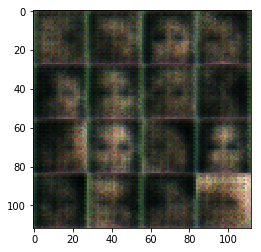

Epoch 1/1  Discriminator Loss: 0.3980 Generator Loss: 3.8659
Epoch 1/1  Discriminator Loss: 0.4494 Generator Loss: 4.8211
Epoch 1/1  Discriminator Loss: 0.3932 Generator Loss: 3.4034
Epoch 1/1  Discriminator Loss: 0.5356 Generator Loss: 4.9671
Epoch 1/1  Discriminator Loss: 0.4084 Generator Loss: 2.8596
Epoch 1/1  Discriminator Loss: 0.3742 Generator Loss: 3.8689
Epoch 1/1  Discriminator Loss: 0.4980 Generator Loss: 4.3251
Epoch 1/1  Discriminator Loss: 0.4288 Generator Loss: 2.5979
Epoch 1/1  Discriminator Loss: 0.4084 Generator Loss: 2.8509
Epoch 1/1  Discriminator Loss: 0.3978 Generator Loss: 2.8056


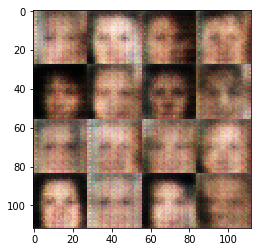

Epoch 1/1  Discriminator Loss: 0.4027 Generator Loss: 3.5614
Epoch 1/1  Discriminator Loss: 0.4243 Generator Loss: 3.9256
Epoch 1/1  Discriminator Loss: 0.3902 Generator Loss: 3.1070
Epoch 1/1  Discriminator Loss: 0.4017 Generator Loss: 2.9165
Epoch 1/1  Discriminator Loss: 0.4605 Generator Loss: 2.2002
Epoch 1/1  Discriminator Loss: 0.3920 Generator Loss: 3.0352
Epoch 1/1  Discriminator Loss: 0.4118 Generator Loss: 3.3572
Epoch 1/1  Discriminator Loss: 0.3966 Generator Loss: 3.0356
Epoch 1/1  Discriminator Loss: 0.4277 Generator Loss: 2.5458
Epoch 1/1  Discriminator Loss: 0.4278 Generator Loss: 4.0981


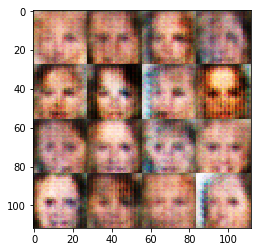

Epoch 1/1  Discriminator Loss: 0.4211 Generator Loss: 2.7196
Epoch 1/1  Discriminator Loss: 0.3838 Generator Loss: 3.0078
Epoch 1/1  Discriminator Loss: 0.3911 Generator Loss: 3.0708
Epoch 1/1  Discriminator Loss: 0.4087 Generator Loss: 3.1659
Epoch 1/1  Discriminator Loss: 0.4269 Generator Loss: 2.5276
Epoch 1/1  Discriminator Loss: 0.3973 Generator Loss: 2.9518
Epoch 1/1  Discriminator Loss: 0.4013 Generator Loss: 2.7916
Epoch 1/1  Discriminator Loss: 0.4003 Generator Loss: 2.9940
Epoch 1/1  Discriminator Loss: 0.4470 Generator Loss: 4.3766
Epoch 1/1  Discriminator Loss: 0.3935 Generator Loss: 3.0713


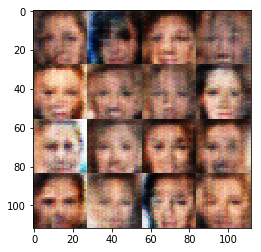

Epoch 1/1  Discriminator Loss: 0.4125 Generator Loss: 2.6710
Epoch 1/1  Discriminator Loss: 0.3978 Generator Loss: 2.8374
Epoch 1/1  Discriminator Loss: 0.4035 Generator Loss: 2.8409
Epoch 1/1  Discriminator Loss: 0.4020 Generator Loss: 2.7157
Epoch 1/1  Discriminator Loss: 0.3905 Generator Loss: 3.2650
Epoch 1/1  Discriminator Loss: 0.4071 Generator Loss: 2.9493
Epoch 1/1  Discriminator Loss: 0.4075 Generator Loss: 2.7182
Epoch 1/1  Discriminator Loss: 0.4149 Generator Loss: 3.5380
Epoch 1/1  Discriminator Loss: 0.4171 Generator Loss: 2.5571
Epoch 1/1  Discriminator Loss: 0.3883 Generator Loss: 2.9877


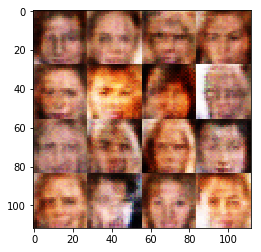

Epoch 1/1  Discriminator Loss: 0.4092 Generator Loss: 2.7939
Epoch 1/1  Discriminator Loss: 0.3952 Generator Loss: 3.1300
Epoch 1/1  Discriminator Loss: 0.3954 Generator Loss: 3.1197
Epoch 1/1  Discriminator Loss: 0.3958 Generator Loss: 2.9425
Epoch 1/1  Discriminator Loss: 0.4014 Generator Loss: 3.5462
Epoch 1/1  Discriminator Loss: 0.4023 Generator Loss: 2.9455
Epoch 1/1  Discriminator Loss: 0.3919 Generator Loss: 3.1444
Epoch 1/1  Discriminator Loss: 0.3939 Generator Loss: 2.8937
Epoch 1/1  Discriminator Loss: 0.3947 Generator Loss: 3.0962
Epoch 1/1  Discriminator Loss: 0.3953 Generator Loss: 3.4294


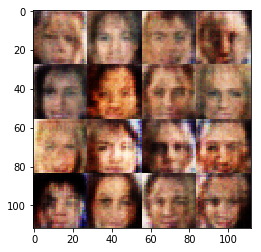

Epoch 1/1  Discriminator Loss: 0.3938 Generator Loss: 3.0567
Epoch 1/1  Discriminator Loss: 0.4036 Generator Loss: 2.7435
Epoch 1/1  Discriminator Loss: 0.3961 Generator Loss: 2.8180
Epoch 1/1  Discriminator Loss: 0.3908 Generator Loss: 3.5876
Epoch 1/1  Discriminator Loss: 0.4036 Generator Loss: 2.8882
Epoch 1/1  Discriminator Loss: 0.3946 Generator Loss: 3.4485
Epoch 1/1  Discriminator Loss: 0.3927 Generator Loss: 3.3936
Epoch 1/1  Discriminator Loss: 0.3909 Generator Loss: 3.0250
Epoch 1/1  Discriminator Loss: 0.4115 Generator Loss: 2.6422
Epoch 1/1  Discriminator Loss: 0.4032 Generator Loss: 2.7308


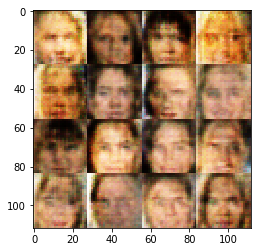

Epoch 1/1  Discriminator Loss: 0.3992 Generator Loss: 3.2057
Epoch 1/1  Discriminator Loss: 0.3948 Generator Loss: 2.9302
Epoch 1/1  Discriminator Loss: 0.3957 Generator Loss: 2.9495
Epoch 1/1  Discriminator Loss: 0.3895 Generator Loss: 3.1309
Epoch 1/1  Discriminator Loss: 0.3985 Generator Loss: 2.8899
Epoch 1/1  Discriminator Loss: 0.3893 Generator Loss: 3.2450
Epoch 1/1  Discriminator Loss: 0.3968 Generator Loss: 2.9057
Epoch 1/1  Discriminator Loss: 0.3993 Generator Loss: 2.9271
Epoch 1/1  Discriminator Loss: 0.3970 Generator Loss: 3.1240
Epoch 1/1  Discriminator Loss: 0.3989 Generator Loss: 2.9844


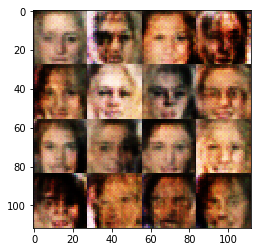

Epoch 1/1  Discriminator Loss: 0.3894 Generator Loss: 2.9550
Epoch 1/1  Discriminator Loss: 0.3976 Generator Loss: 2.9027
Epoch 1/1  Discriminator Loss: 0.4012 Generator Loss: 2.9142
Epoch 1/1  Discriminator Loss: 0.4074 Generator Loss: 3.2884
Epoch 1/1  Discriminator Loss: 0.3922 Generator Loss: 3.1240
Epoch 1/1  Discriminator Loss: 0.3878 Generator Loss: 3.1974
Epoch 1/1  Discriminator Loss: 0.4004 Generator Loss: 2.8629
Epoch 1/1  Discriminator Loss: 0.4152 Generator Loss: 3.9792
Epoch 1/1  Discriminator Loss: 0.4020 Generator Loss: 2.8321
Epoch 1/1  Discriminator Loss: 0.3892 Generator Loss: 3.0016


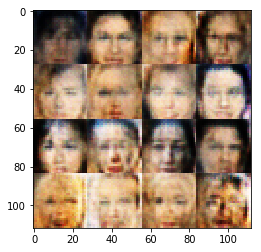

Epoch 1/1  Discriminator Loss: 0.4010 Generator Loss: 2.8468
Epoch 1/1  Discriminator Loss: 0.4081 Generator Loss: 2.7948
Epoch 1/1  Discriminator Loss: 0.4080 Generator Loss: 3.5126
Epoch 1/1  Discriminator Loss: 0.4000 Generator Loss: 3.3023
Epoch 1/1  Discriminator Loss: 0.3906 Generator Loss: 2.9899
Epoch 1/1  Discriminator Loss: 0.3957 Generator Loss: 3.1560
Epoch 1/1  Discriminator Loss: 0.3931 Generator Loss: 2.9591
Epoch 1/1  Discriminator Loss: 0.3906 Generator Loss: 3.0318
Epoch 1/1  Discriminator Loss: 0.3886 Generator Loss: 3.0987
Epoch 1/1  Discriminator Loss: 0.3875 Generator Loss: 3.0593


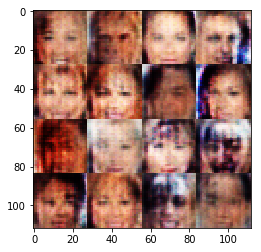

Epoch 1/1  Discriminator Loss: 0.4108 Generator Loss: 3.5576
Epoch 1/1  Discriminator Loss: 0.4017 Generator Loss: 3.5037
Epoch 1/1  Discriminator Loss: 0.4014 Generator Loss: 2.9291
Epoch 1/1  Discriminator Loss: 0.3986 Generator Loss: 3.1518
Epoch 1/1  Discriminator Loss: 0.3954 Generator Loss: 2.9061
Epoch 1/1  Discriminator Loss: 0.3893 Generator Loss: 3.0270
Epoch 1/1  Discriminator Loss: 0.4038 Generator Loss: 3.2044
Epoch 1/1  Discriminator Loss: 0.4002 Generator Loss: 3.4607
Epoch 1/1  Discriminator Loss: 0.3940 Generator Loss: 2.9384
Epoch 1/1  Discriminator Loss: 0.3972 Generator Loss: 3.1215


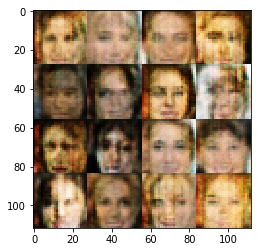

Epoch 1/1  Discriminator Loss: 0.3986 Generator Loss: 2.7894
Epoch 1/1  Discriminator Loss: 0.3961 Generator Loss: 3.4188
Epoch 1/1  Discriminator Loss: 0.3930 Generator Loss: 2.8865
Epoch 1/1  Discriminator Loss: 0.3989 Generator Loss: 3.2797
Epoch 1/1  Discriminator Loss: 0.4089 Generator Loss: 2.9570
Epoch 1/1  Discriminator Loss: 0.3988 Generator Loss: 2.9799
Epoch 1/1  Discriminator Loss: 0.3900 Generator Loss: 2.9481
Epoch 1/1  Discriminator Loss: 0.3976 Generator Loss: 3.1249
Epoch 1/1  Discriminator Loss: 0.3913 Generator Loss: 2.9487
Epoch 1/1  Discriminator Loss: 0.3896 Generator Loss: 3.1586


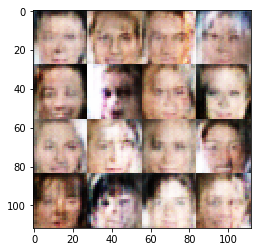

Epoch 1/1  Discriminator Loss: 0.3900 Generator Loss: 3.3591
Epoch 1/1  Discriminator Loss: 0.4026 Generator Loss: 3.0024
Epoch 1/1  Discriminator Loss: 0.3902 Generator Loss: 3.1174
Epoch 1/1  Discriminator Loss: 0.4005 Generator Loss: 2.7956
Epoch 1/1  Discriminator Loss: 0.3921 Generator Loss: 3.1815
Epoch 1/1  Discriminator Loss: 0.3942 Generator Loss: 2.9214
Epoch 1/1  Discriminator Loss: 0.3922 Generator Loss: 3.3092
Epoch 1/1  Discriminator Loss: 0.3911 Generator Loss: 3.1203
Epoch 1/1  Discriminator Loss: 0.4002 Generator Loss: 3.2826
Epoch 1/1  Discriminator Loss: 0.3993 Generator Loss: 3.0278


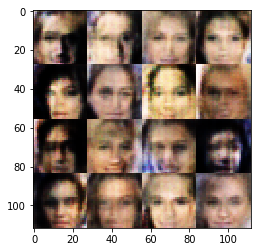

Epoch 1/1  Discriminator Loss: 0.3934 Generator Loss: 3.2574
Epoch 1/1  Discriminator Loss: 0.3904 Generator Loss: 3.4902
Epoch 1/1  Discriminator Loss: 0.3824 Generator Loss: 3.2566
Epoch 1/1  Discriminator Loss: 0.3882 Generator Loss: 3.3305
Epoch 1/1  Discriminator Loss: 0.4033 Generator Loss: 2.9721
Epoch 1/1  Discriminator Loss: 0.3945 Generator Loss: 2.8887
Epoch 1/1  Discriminator Loss: 0.3909 Generator Loss: 3.0933
Epoch 1/1  Discriminator Loss: 0.3898 Generator Loss: 3.2072
Epoch 1/1  Discriminator Loss: 0.4101 Generator Loss: 2.8444
Epoch 1/1  Discriminator Loss: 0.3880 Generator Loss: 3.2361


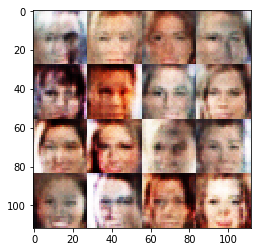

Epoch 1/1  Discriminator Loss: 0.4118 Generator Loss: 2.6235
Epoch 1/1  Discriminator Loss: 0.3967 Generator Loss: 3.2918
Epoch 1/1  Discriminator Loss: 0.3998 Generator Loss: 2.8918
Epoch 1/1  Discriminator Loss: 0.3831 Generator Loss: 2.9694
Epoch 1/1  Discriminator Loss: 0.3935 Generator Loss: 3.0601
Epoch 1/1  Discriminator Loss: 0.3904 Generator Loss: 2.9782
Epoch 1/1  Discriminator Loss: 0.4131 Generator Loss: 2.6066
Epoch 1/1  Discriminator Loss: 0.3981 Generator Loss: 3.2429
Epoch 1/1  Discriminator Loss: 0.3898 Generator Loss: 3.1041
Epoch 1/1  Discriminator Loss: 0.4044 Generator Loss: 2.7326


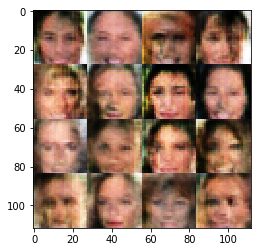

Epoch 1/1  Discriminator Loss: 0.3933 Generator Loss: 2.9191
Epoch 1/1  Discriminator Loss: 0.3956 Generator Loss: 3.3664
Epoch 1/1  Discriminator Loss: 0.4085 Generator Loss: 2.8101
Epoch 1/1  Discriminator Loss: 0.4118 Generator Loss: 2.6913
Epoch 1/1  Discriminator Loss: 0.4017 Generator Loss: 2.7462
Epoch 1/1  Discriminator Loss: 0.3888 Generator Loss: 3.2032
Epoch 1/1  Discriminator Loss: 0.4146 Generator Loss: 3.6451
Epoch 1/1  Discriminator Loss: 0.3899 Generator Loss: 3.0627
Epoch 1/1  Discriminator Loss: 0.3878 Generator Loss: 2.9715
Epoch 1/1  Discriminator Loss: 0.3996 Generator Loss: 2.8355


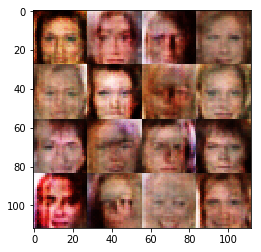

Epoch 1/1  Discriminator Loss: 0.4006 Generator Loss: 2.7851
Epoch 1/1  Discriminator Loss: 0.3918 Generator Loss: 2.8420
Epoch 1/1  Discriminator Loss: 0.4155 Generator Loss: 2.6115
Epoch 1/1  Discriminator Loss: 0.3903 Generator Loss: 3.0735
Epoch 1/1  Discriminator Loss: 0.3895 Generator Loss: 3.3583
Epoch 1/1  Discriminator Loss: 0.4244 Generator Loss: 2.4659
Epoch 1/1  Discriminator Loss: 0.4000 Generator Loss: 2.9086
Epoch 1/1  Discriminator Loss: 0.3999 Generator Loss: 2.9480
Epoch 1/1  Discriminator Loss: 0.3961 Generator Loss: 2.9715
Epoch 1/1  Discriminator Loss: 0.4020 Generator Loss: 2.9126


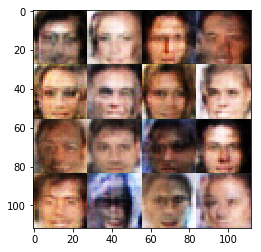

Epoch 1/1  Discriminator Loss: 0.3887 Generator Loss: 3.1346
Epoch 1/1  Discriminator Loss: 0.3909 Generator Loss: 3.0525
Epoch 1/1  Discriminator Loss: 0.4031 Generator Loss: 2.7350
Epoch 1/1  Discriminator Loss: 0.3867 Generator Loss: 3.4106
Epoch 1/1  Discriminator Loss: 0.3900 Generator Loss: 3.2124
Epoch 1/1  Discriminator Loss: 0.4479 Generator Loss: 4.2376
Epoch 1/1  Discriminator Loss: 0.3983 Generator Loss: 3.1611
Epoch 1/1  Discriminator Loss: 0.4081 Generator Loss: 2.7829
Epoch 1/1  Discriminator Loss: 0.4073 Generator Loss: 2.6846
Epoch 1/1  Discriminator Loss: 0.4013 Generator Loss: 2.8644


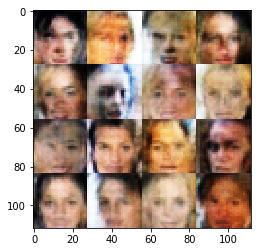

Epoch 1/1  Discriminator Loss: 0.3935 Generator Loss: 3.3155
Epoch 1/1  Discriminator Loss: 0.3909 Generator Loss: 2.9744
Epoch 1/1  Discriminator Loss: 0.4046 Generator Loss: 2.8516
Epoch 1/1  Discriminator Loss: 0.3839 Generator Loss: 3.1974
Epoch 1/1  Discriminator Loss: 0.3898 Generator Loss: 3.0868
Epoch 1/1  Discriminator Loss: 0.3914 Generator Loss: 3.3220
Epoch 1/1  Discriminator Loss: 0.3916 Generator Loss: 3.0174
Epoch 1/1  Discriminator Loss: 0.3885 Generator Loss: 3.3219
Epoch 1/1  Discriminator Loss: 0.3813 Generator Loss: 3.2236
Epoch 1/1  Discriminator Loss: 0.3984 Generator Loss: 2.8015


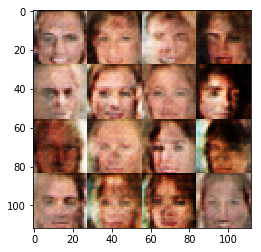

Epoch 1/1  Discriminator Loss: 0.3975 Generator Loss: 2.8604
Epoch 1/1  Discriminator Loss: 0.4035 Generator Loss: 2.7318
Epoch 1/1  Discriminator Loss: 0.4018 Generator Loss: 2.9004
Epoch 1/1  Discriminator Loss: 0.4001 Generator Loss: 3.6326
Epoch 1/1  Discriminator Loss: 0.3941 Generator Loss: 2.8906
Epoch 1/1  Discriminator Loss: 0.4008 Generator Loss: 3.0357
Epoch 1/1  Discriminator Loss: 0.3985 Generator Loss: 3.1515
Epoch 1/1  Discriminator Loss: 0.3912 Generator Loss: 2.9008
Epoch 1/1  Discriminator Loss: 0.3839 Generator Loss: 3.2142
Epoch 1/1  Discriminator Loss: 0.3941 Generator Loss: 2.9669


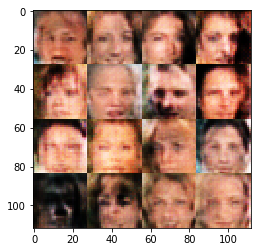

Epoch 1/1  Discriminator Loss: 0.3884 Generator Loss: 3.3871
Epoch 1/1  Discriminator Loss: 0.3949 Generator Loss: 3.1169
Epoch 1/1  Discriminator Loss: 0.3976 Generator Loss: 2.8321
Epoch 1/1  Discriminator Loss: 0.3950 Generator Loss: 3.0869
Epoch 1/1  Discriminator Loss: 0.3996 Generator Loss: 2.9964
Epoch 1/1  Discriminator Loss: 0.3927 Generator Loss: 3.3626
Epoch 1/1  Discriminator Loss: 0.4012 Generator Loss: 3.1614
Epoch 1/1  Discriminator Loss: 0.3942 Generator Loss: 2.8921
Epoch 1/1  Discriminator Loss: 0.3779 Generator Loss: 3.3767
Epoch 1/1  Discriminator Loss: 0.3846 Generator Loss: 3.2422


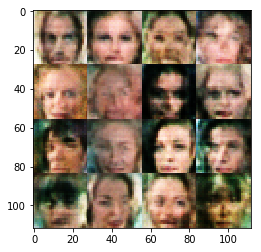

Epoch 1/1  Discriminator Loss: 0.3940 Generator Loss: 2.9455
Epoch 1/1  Discriminator Loss: 0.3885 Generator Loss: 3.2938
Epoch 1/1  Discriminator Loss: 0.4025 Generator Loss: 3.5066
Epoch 1/1  Discriminator Loss: 0.3925 Generator Loss: 3.1176
Epoch 1/1  Discriminator Loss: 0.3901 Generator Loss: 2.9302
Epoch 1/1  Discriminator Loss: 0.3945 Generator Loss: 3.0116
Epoch 1/1  Discriminator Loss: 0.4045 Generator Loss: 2.9414
Epoch 1/1  Discriminator Loss: 0.3909 Generator Loss: 2.9289
Epoch 1/1  Discriminator Loss: 0.4056 Generator Loss: 3.6277
Epoch 1/1  Discriminator Loss: 0.3914 Generator Loss: 2.9773


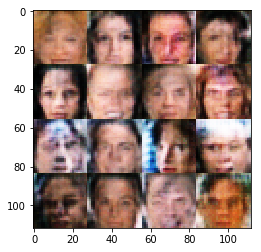

Epoch 1/1  Discriminator Loss: 0.3902 Generator Loss: 2.8841
Epoch 1/1  Discriminator Loss: 0.3857 Generator Loss: 3.2709
Epoch 1/1  Discriminator Loss: 0.3920 Generator Loss: 3.6447
Epoch 1/1  Discriminator Loss: 0.4018 Generator Loss: 2.8287
Epoch 1/1  Discriminator Loss: 0.3963 Generator Loss: 2.8552
Epoch 1/1  Discriminator Loss: 0.3865 Generator Loss: 3.2782
Epoch 1/1  Discriminator Loss: 0.3981 Generator Loss: 3.1896
Epoch 1/1  Discriminator Loss: 0.3948 Generator Loss: 2.9684
Epoch 1/1  Discriminator Loss: 0.4016 Generator Loss: 3.2424
Epoch 1/1  Discriminator Loss: 0.3942 Generator Loss: 2.9063


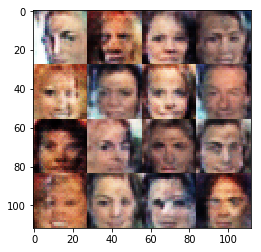

Epoch 1/1  Discriminator Loss: 0.4046 Generator Loss: 3.5326
Epoch 1/1  Discriminator Loss: 0.4044 Generator Loss: 2.6654
Epoch 1/1  Discriminator Loss: 0.3968 Generator Loss: 3.3905
Epoch 1/1  Discriminator Loss: 0.3899 Generator Loss: 2.9298
Epoch 1/1  Discriminator Loss: 0.3932 Generator Loss: 2.8762
Epoch 1/1  Discriminator Loss: 0.3984 Generator Loss: 2.7571
Epoch 1/1  Discriminator Loss: 0.3857 Generator Loss: 3.1886
Epoch 1/1  Discriminator Loss: 0.3975 Generator Loss: 2.8294
Epoch 1/1  Discriminator Loss: 0.3983 Generator Loss: 3.2773
Epoch 1/1  Discriminator Loss: 0.4028 Generator Loss: 3.6412


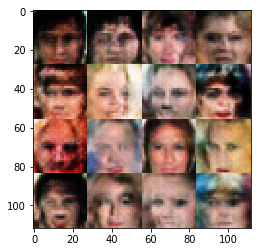

Epoch 1/1  Discriminator Loss: 0.3828 Generator Loss: 3.1263
Epoch 1/1  Discriminator Loss: 0.4092 Generator Loss: 2.7829
Epoch 1/1  Discriminator Loss: 0.4035 Generator Loss: 2.7577
Epoch 1/1  Discriminator Loss: 0.3922 Generator Loss: 3.2401
Epoch 1/1  Discriminator Loss: 0.4048 Generator Loss: 2.7503
Epoch 1/1  Discriminator Loss: 0.3853 Generator Loss: 3.0593
Epoch 1/1  Discriminator Loss: 0.3991 Generator Loss: 2.7754
Epoch 1/1  Discriminator Loss: 0.4043 Generator Loss: 2.7272
Epoch 1/1  Discriminator Loss: 0.4088 Generator Loss: 3.6661
Epoch 1/1  Discriminator Loss: 0.3901 Generator Loss: 3.1174


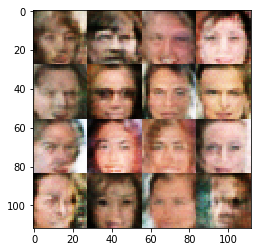

Epoch 1/1  Discriminator Loss: 0.3943 Generator Loss: 2.9895
Epoch 1/1  Discriminator Loss: 0.3877 Generator Loss: 3.1802
Epoch 1/1  Discriminator Loss: 0.3846 Generator Loss: 3.1920
Epoch 1/1  Discriminator Loss: 0.3849 Generator Loss: 3.0690
Epoch 1/1  Discriminator Loss: 0.4046 Generator Loss: 3.3615
Epoch 1/1  Discriminator Loss: 0.4112 Generator Loss: 3.7000
Epoch 1/1  Discriminator Loss: 0.3886 Generator Loss: 3.2362
Epoch 1/1  Discriminator Loss: 0.3908 Generator Loss: 2.9618
Epoch 1/1  Discriminator Loss: 0.3868 Generator Loss: 3.0304
Epoch 1/1  Discriminator Loss: 0.3865 Generator Loss: 3.0340


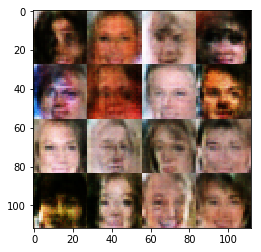

Epoch 1/1  Discriminator Loss: 0.4050 Generator Loss: 2.8458
Epoch 1/1  Discriminator Loss: 0.3957 Generator Loss: 3.1001
Epoch 1/1  Discriminator Loss: 0.3987 Generator Loss: 3.1327
Epoch 1/1  Discriminator Loss: 0.3908 Generator Loss: 3.1062
Epoch 1/1  Discriminator Loss: 0.3994 Generator Loss: 3.5261
Epoch 1/1  Discriminator Loss: 0.4010 Generator Loss: 2.9173
Epoch 1/1  Discriminator Loss: 0.3838 Generator Loss: 3.2020
Epoch 1/1  Discriminator Loss: 0.3936 Generator Loss: 2.9323
Epoch 1/1  Discriminator Loss: 0.4159 Generator Loss: 2.5364
Epoch 1/1  Discriminator Loss: 0.3874 Generator Loss: 3.2190


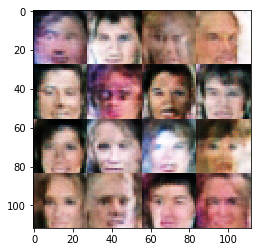

Epoch 1/1  Discriminator Loss: 0.3991 Generator Loss: 2.8121
Epoch 1/1  Discriminator Loss: 0.3843 Generator Loss: 3.2799
Epoch 1/1  Discriminator Loss: 0.3884 Generator Loss: 2.9455
Epoch 1/1  Discriminator Loss: 0.4208 Generator Loss: 2.5106
Epoch 1/1  Discriminator Loss: 0.3981 Generator Loss: 3.3225
Epoch 1/1  Discriminator Loss: 0.3902 Generator Loss: 3.2543
Epoch 1/1  Discriminator Loss: 0.4060 Generator Loss: 3.8149
Epoch 1/1  Discriminator Loss: 0.3894 Generator Loss: 3.0123
Epoch 1/1  Discriminator Loss: 0.3896 Generator Loss: 2.9228
Epoch 1/1  Discriminator Loss: 0.3976 Generator Loss: 2.8316


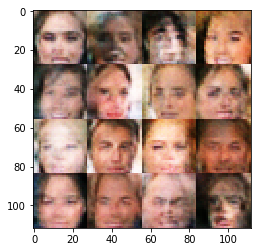

Epoch 1/1  Discriminator Loss: 0.3890 Generator Loss: 3.4647
Epoch 1/1  Discriminator Loss: 0.4018 Generator Loss: 3.7882
Epoch 1/1  Discriminator Loss: 0.3963 Generator Loss: 2.8907
Epoch 1/1  Discriminator Loss: 0.3974 Generator Loss: 2.9254
Epoch 1/1  Discriminator Loss: 0.3928 Generator Loss: 3.1533
Epoch 1/1  Discriminator Loss: 0.4092 Generator Loss: 2.7048
Epoch 1/1  Discriminator Loss: 0.3937 Generator Loss: 3.0328
Epoch 1/1  Discriminator Loss: 0.3919 Generator Loss: 3.0069
Epoch 1/1  Discriminator Loss: 0.3863 Generator Loss: 3.1761
Epoch 1/1  Discriminator Loss: 0.4087 Generator Loss: 3.6378


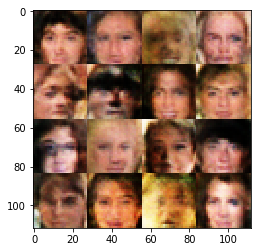

Epoch 1/1  Discriminator Loss: 0.3818 Generator Loss: 3.1647
Epoch 1/1  Discriminator Loss: 0.4236 Generator Loss: 3.9169
Epoch 1/1  Discriminator Loss: 0.3867 Generator Loss: 3.1602
Epoch 1/1  Discriminator Loss: 0.4037 Generator Loss: 2.6556
Epoch 1/1  Discriminator Loss: 0.4014 Generator Loss: 3.4623
Epoch 1/1  Discriminator Loss: 0.3831 Generator Loss: 3.6083
Epoch 1/1  Discriminator Loss: 0.3991 Generator Loss: 2.9817
Epoch 1/1  Discriminator Loss: 0.3858 Generator Loss: 3.0386
Epoch 1/1  Discriminator Loss: 0.3924 Generator Loss: 3.1230
Epoch 1/1  Discriminator Loss: 0.3808 Generator Loss: 3.5199


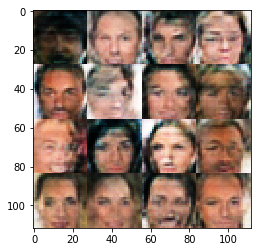

Epoch 1/1  Discriminator Loss: 0.3988 Generator Loss: 3.1778
Epoch 1/1  Discriminator Loss: 0.3895 Generator Loss: 3.1059
Epoch 1/1  Discriminator Loss: 0.3826 Generator Loss: 3.0894
Epoch 1/1  Discriminator Loss: 0.3896 Generator Loss: 2.8933
Epoch 1/1  Discriminator Loss: 0.3890 Generator Loss: 3.4210
Epoch 1/1  Discriminator Loss: 0.3883 Generator Loss: 2.9624
Epoch 1/1  Discriminator Loss: 0.3966 Generator Loss: 2.8207
Epoch 1/1  Discriminator Loss: 0.3843 Generator Loss: 3.0030
Epoch 1/1  Discriminator Loss: 0.3802 Generator Loss: 3.3071
Epoch 1/1  Discriminator Loss: 0.4190 Generator Loss: 2.5506


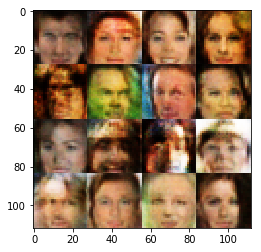

Epoch 1/1  Discriminator Loss: 0.3886 Generator Loss: 3.0182
Epoch 1/1  Discriminator Loss: 0.3906 Generator Loss: 2.9311
Epoch 1/1  Discriminator Loss: 0.3888 Generator Loss: 3.0671
Epoch 1/1  Discriminator Loss: 0.3959 Generator Loss: 3.1647
Epoch 1/1  Discriminator Loss: 0.3872 Generator Loss: 3.6856
Epoch 1/1  Discriminator Loss: 0.3895 Generator Loss: 2.9466
Epoch 1/1  Discriminator Loss: 0.3851 Generator Loss: 3.0960
Epoch 1/1  Discriminator Loss: 0.3844 Generator Loss: 3.4633
Epoch 1/1  Discriminator Loss: 0.4095 Generator Loss: 2.7255
Epoch 1/1  Discriminator Loss: 0.4078 Generator Loss: 2.7318


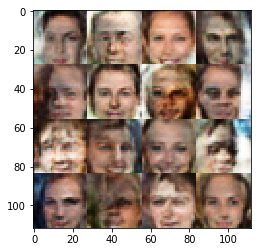

Epoch 1/1  Discriminator Loss: 0.3974 Generator Loss: 3.0161
Epoch 1/1  Discriminator Loss: 0.3958 Generator Loss: 3.3817
Epoch 1/1  Discriminator Loss: 0.3866 Generator Loss: 3.2408
Epoch 1/1  Discriminator Loss: 0.3968 Generator Loss: 2.8522
Epoch 1/1  Discriminator Loss: 0.3893 Generator Loss: 3.3873
Epoch 1/1  Discriminator Loss: 0.3864 Generator Loss: 3.0416
Epoch 1/1  Discriminator Loss: 0.3952 Generator Loss: 2.9577
Epoch 1/1  Discriminator Loss: 0.3983 Generator Loss: 2.7842
Epoch 1/1  Discriminator Loss: 0.4179 Generator Loss: 2.5592
Epoch 1/1  Discriminator Loss: 0.4020 Generator Loss: 2.8326


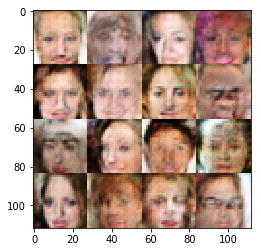

Epoch 1/1  Discriminator Loss: 0.3950 Generator Loss: 3.0158
Epoch 1/1  Discriminator Loss: 0.4040 Generator Loss: 3.0836
Epoch 1/1  Discriminator Loss: 0.3888 Generator Loss: 3.1215
Epoch 1/1  Discriminator Loss: 0.3995 Generator Loss: 2.9684
Epoch 1/1  Discriminator Loss: 0.3834 Generator Loss: 3.2294
Epoch 1/1  Discriminator Loss: 0.3930 Generator Loss: 3.2713
Epoch 1/1  Discriminator Loss: 0.3915 Generator Loss: 3.0122
Epoch 1/1  Discriminator Loss: 0.3896 Generator Loss: 2.8688
Epoch 1/1  Discriminator Loss: 0.3907 Generator Loss: 3.1588
Epoch 1/1  Discriminator Loss: 0.3985 Generator Loss: 3.3397


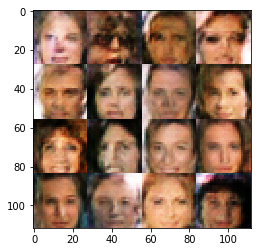

Epoch 1/1  Discriminator Loss: 0.4257 Generator Loss: 2.4933
Epoch 1/1  Discriminator Loss: 0.3979 Generator Loss: 2.9480
Epoch 1/1  Discriminator Loss: 0.3878 Generator Loss: 3.1000
Epoch 1/1  Discriminator Loss: 0.3887 Generator Loss: 2.9910
Epoch 1/1  Discriminator Loss: 0.3913 Generator Loss: 3.0367
Epoch 1/1  Discriminator Loss: 0.3967 Generator Loss: 2.8079
Epoch 1/1  Discriminator Loss: 0.3957 Generator Loss: 2.7644
Epoch 1/1  Discriminator Loss: 0.3791 Generator Loss: 3.3803
Epoch 1/1  Discriminator Loss: 0.3958 Generator Loss: 2.8935
Epoch 1/1  Discriminator Loss: 0.3831 Generator Loss: 3.1045


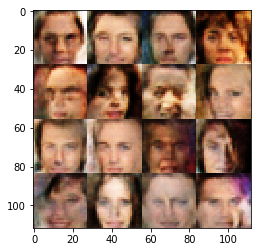

Epoch 1/1  Discriminator Loss: 0.4010 Generator Loss: 2.8075
Epoch 1/1  Discriminator Loss: 0.4012 Generator Loss: 2.7189
Epoch 1/1  Discriminator Loss: 0.3957 Generator Loss: 2.8813
Epoch 1/1  Discriminator Loss: 0.3885 Generator Loss: 3.1090
Epoch 1/1  Discriminator Loss: 0.3903 Generator Loss: 2.8447
Epoch 1/1  Discriminator Loss: 0.4039 Generator Loss: 2.7876
Epoch 1/1  Discriminator Loss: 0.3931 Generator Loss: 3.0460
Epoch 1/1  Discriminator Loss: 0.3904 Generator Loss: 3.0244
Epoch 1/1  Discriminator Loss: 0.4099 Generator Loss: 3.8995
Epoch 1/1  Discriminator Loss: 0.4020 Generator Loss: 3.6128


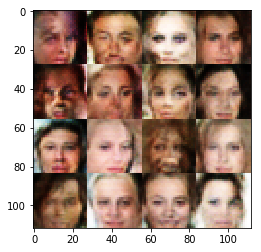

Epoch 1/1  Discriminator Loss: 0.3854 Generator Loss: 3.0805
Epoch 1/1  Discriminator Loss: 0.4004 Generator Loss: 2.9218
Epoch 1/1  Discriminator Loss: 0.4033 Generator Loss: 2.7792
Epoch 1/1  Discriminator Loss: 0.4034 Generator Loss: 2.7892
Epoch 1/1  Discriminator Loss: 0.3918 Generator Loss: 2.9105
Epoch 1/1  Discriminator Loss: 0.3810 Generator Loss: 3.1801
Epoch 1/1  Discriminator Loss: 0.3872 Generator Loss: 3.0421
Epoch 1/1  Discriminator Loss: 0.3887 Generator Loss: 3.0288
Epoch 1/1  Discriminator Loss: 0.3776 Generator Loss: 3.3176
Epoch 1/1  Discriminator Loss: 0.4181 Generator Loss: 2.5774


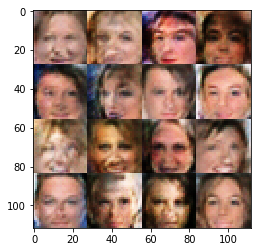

Epoch 1/1  Discriminator Loss: 0.3901 Generator Loss: 3.4321
Epoch 1/1  Discriminator Loss: 0.4090 Generator Loss: 2.6658
Epoch 1/1  Discriminator Loss: 0.3870 Generator Loss: 3.4563
Epoch 1/1  Discriminator Loss: 0.3892 Generator Loss: 2.9690
Epoch 1/1  Discriminator Loss: 0.3876 Generator Loss: 3.1563
Epoch 1/1  Discriminator Loss: 0.3933 Generator Loss: 3.0184
Epoch 1/1  Discriminator Loss: 0.4047 Generator Loss: 2.7668
Epoch 1/1  Discriminator Loss: 0.3868 Generator Loss: 3.0150
Epoch 1/1  Discriminator Loss: 0.4048 Generator Loss: 2.7647
Epoch 1/1  Discriminator Loss: 0.3847 Generator Loss: 3.0987


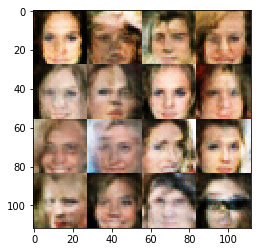

Epoch 1/1  Discriminator Loss: 0.3845 Generator Loss: 3.1273
Epoch 1/1  Discriminator Loss: 0.4188 Generator Loss: 2.5700
Epoch 1/1  Discriminator Loss: 0.3837 Generator Loss: 3.3171
Epoch 1/1  Discriminator Loss: 0.3833 Generator Loss: 3.1161
Epoch 1/1  Discriminator Loss: 0.3984 Generator Loss: 2.8094
Epoch 1/1  Discriminator Loss: 0.3883 Generator Loss: 3.0573
Epoch 1/1  Discriminator Loss: 0.3842 Generator Loss: 2.9979
Epoch 1/1  Discriminator Loss: 0.3940 Generator Loss: 2.9338
Epoch 1/1  Discriminator Loss: 0.3960 Generator Loss: 3.0014
Epoch 1/1  Discriminator Loss: 0.4381 Generator Loss: 4.6273


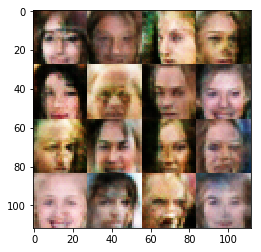

Epoch 1/1  Discriminator Loss: 0.3984 Generator Loss: 3.0004
Epoch 1/1  Discriminator Loss: 0.3978 Generator Loss: 2.9859
Epoch 1/1  Discriminator Loss: 0.3918 Generator Loss: 3.0593
Epoch 1/1  Discriminator Loss: 0.3927 Generator Loss: 3.0707
Epoch 1/1  Discriminator Loss: 0.3889 Generator Loss: 3.0614
Epoch 1/1  Discriminator Loss: 0.3886 Generator Loss: 3.2800
Epoch 1/1  Discriminator Loss: 0.3862 Generator Loss: 3.0999
Epoch 1/1  Discriminator Loss: 0.3844 Generator Loss: 3.1288
Epoch 1/1  Discriminator Loss: 0.3918 Generator Loss: 3.1089
Epoch 1/1  Discriminator Loss: 0.3871 Generator Loss: 3.1653


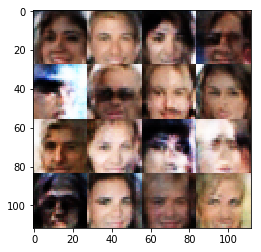

Epoch 1/1  Discriminator Loss: 0.3847 Generator Loss: 2.9908
Epoch 1/1  Discriminator Loss: 0.3852 Generator Loss: 2.9955
Epoch 1/1  Discriminator Loss: 0.3913 Generator Loss: 2.8797
Epoch 1/1  Discriminator Loss: 0.3912 Generator Loss: 2.9400
Epoch 1/1  Discriminator Loss: 0.3977 Generator Loss: 2.9266
Epoch 1/1  Discriminator Loss: 0.4000 Generator Loss: 2.8891
Epoch 1/1  Discriminator Loss: 0.3974 Generator Loss: 3.0431
Epoch 1/1  Discriminator Loss: 0.3973 Generator Loss: 3.0760
Epoch 1/1  Discriminator Loss: 0.3897 Generator Loss: 3.5416
Epoch 1/1  Discriminator Loss: 0.4059 Generator Loss: 2.7770


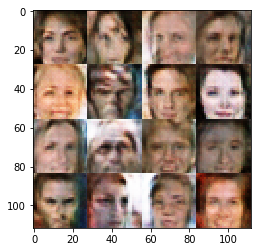

Epoch 1/1  Discriminator Loss: 0.3936 Generator Loss: 3.0222
Epoch 1/1  Discriminator Loss: 0.3880 Generator Loss: 3.0865
Epoch 1/1  Discriminator Loss: 0.3825 Generator Loss: 3.2709
Epoch 1/1  Discriminator Loss: 0.3969 Generator Loss: 2.8127
Epoch 1/1  Discriminator Loss: 0.3979 Generator Loss: 3.4834
Epoch 1/1  Discriminator Loss: 0.3856 Generator Loss: 3.1792
Epoch 1/1  Discriminator Loss: 0.3864 Generator Loss: 2.9986
Epoch 1/1  Discriminator Loss: 0.3934 Generator Loss: 2.8140
Epoch 1/1  Discriminator Loss: 0.3971 Generator Loss: 3.4450
Epoch 1/1  Discriminator Loss: 0.3874 Generator Loss: 3.3841


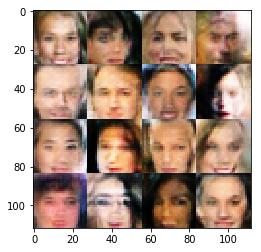

Epoch 1/1  Discriminator Loss: 0.3886 Generator Loss: 3.0020
Epoch 1/1  Discriminator Loss: 0.3867 Generator Loss: 3.2965
Epoch 1/1  Discriminator Loss: 0.3950 Generator Loss: 2.8778
Epoch 1/1  Discriminator Loss: 0.3903 Generator Loss: 2.9951
Epoch 1/1  Discriminator Loss: 0.3816 Generator Loss: 3.1842
Epoch 1/1  Discriminator Loss: 0.3748 Generator Loss: 3.2375
Epoch 1/1  Discriminator Loss: 0.3899 Generator Loss: 3.2234
Epoch 1/1  Discriminator Loss: 0.3882 Generator Loss: 3.0843
Epoch 1/1  Discriminator Loss: 0.3910 Generator Loss: 2.9049
Epoch 1/1  Discriminator Loss: 0.3854 Generator Loss: 3.0754


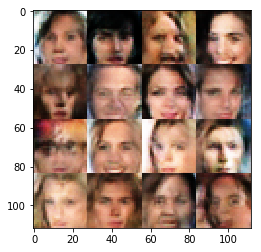

Epoch 1/1  Discriminator Loss: 0.3959 Generator Loss: 2.8840
Epoch 1/1  Discriminator Loss: 0.3899 Generator Loss: 3.0252
Epoch 1/1  Discriminator Loss: 0.3899 Generator Loss: 2.9563
Epoch 1/1  Discriminator Loss: 0.3972 Generator Loss: 2.8549
Epoch 1/1  Discriminator Loss: 0.3950 Generator Loss: 2.9878
Epoch 1/1  Discriminator Loss: 0.4068 Generator Loss: 2.6879
Epoch 1/1  Discriminator Loss: 0.3928 Generator Loss: 2.8973
Epoch 1/1  Discriminator Loss: 0.4383 Generator Loss: 2.2993
Epoch 1/1  Discriminator Loss: 0.3974 Generator Loss: 2.7703
Epoch 1/1  Discriminator Loss: 0.3933 Generator Loss: 2.9277


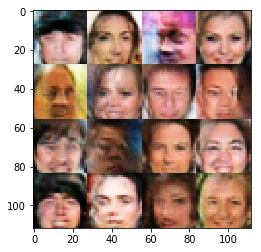

Epoch 1/1  Discriminator Loss: 0.3933 Generator Loss: 2.8735
Epoch 1/1  Discriminator Loss: 0.3884 Generator Loss: 3.2139
Epoch 1/1  Discriminator Loss: 0.3913 Generator Loss: 2.9585
Epoch 1/1  Discriminator Loss: 0.3818 Generator Loss: 3.1053
Epoch 1/1  Discriminator Loss: 0.3812 Generator Loss: 3.1160
Epoch 1/1  Discriminator Loss: 0.3969 Generator Loss: 2.7897
Epoch 1/1  Discriminator Loss: 0.4053 Generator Loss: 2.7632
Epoch 1/1  Discriminator Loss: 0.3828 Generator Loss: 3.1263
Epoch 1/1  Discriminator Loss: 0.3946 Generator Loss: 3.0013
Epoch 1/1  Discriminator Loss: 0.3910 Generator Loss: 2.9727


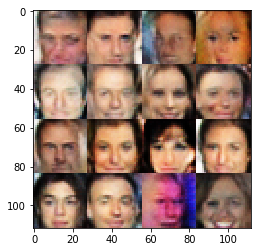

Epoch 1/1  Discriminator Loss: 0.4062 Generator Loss: 3.5164
Epoch 1/1  Discriminator Loss: 0.3858 Generator Loss: 3.0717
Epoch 1/1  Discriminator Loss: 0.3861 Generator Loss: 2.9822
Epoch 1/1  Discriminator Loss: 0.3888 Generator Loss: 3.0144
Epoch 1/1  Discriminator Loss: 0.3955 Generator Loss: 3.8462
Epoch 1/1  Discriminator Loss: 0.3907 Generator Loss: 3.0074
Epoch 1/1  Discriminator Loss: 0.3910 Generator Loss: 2.9187
Epoch 1/1  Discriminator Loss: 0.3792 Generator Loss: 3.1373
Epoch 1/1  Discriminator Loss: 0.3845 Generator Loss: 3.1839
Epoch 1/1  Discriminator Loss: 0.3957 Generator Loss: 3.4529


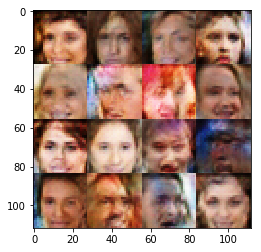

Epoch 1/1  Discriminator Loss: 0.3917 Generator Loss: 2.8830
Epoch 1/1  Discriminator Loss: 0.3862 Generator Loss: 3.2443
Epoch 1/1  Discriminator Loss: 0.3817 Generator Loss: 3.0899
Epoch 1/1  Discriminator Loss: 0.3938 Generator Loss: 2.8948
Epoch 1/1  Discriminator Loss: 0.3952 Generator Loss: 2.8072
Epoch 1/1  Discriminator Loss: 0.3847 Generator Loss: 3.1706
Epoch 1/1  Discriminator Loss: 0.3851 Generator Loss: 3.0226
Epoch 1/1  Discriminator Loss: 0.3857 Generator Loss: 3.2143
Epoch 1/1  Discriminator Loss: 0.4024 Generator Loss: 2.6885
Epoch 1/1  Discriminator Loss: 0.4021 Generator Loss: 2.7800


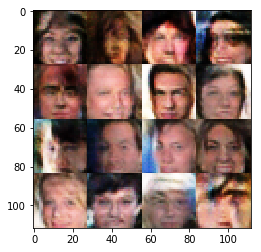

Epoch 1/1  Discriminator Loss: 0.3845 Generator Loss: 3.2886
Epoch 1/1  Discriminator Loss: 0.3875 Generator Loss: 3.0022
Epoch 1/1  Discriminator Loss: 0.3912 Generator Loss: 2.9383
Epoch 1/1  Discriminator Loss: 0.3819 Generator Loss: 3.0860
Epoch 1/1  Discriminator Loss: 0.4030 Generator Loss: 3.0876
Epoch 1/1  Discriminator Loss: 0.4072 Generator Loss: 2.7220
Epoch 1/1  Discriminator Loss: 0.3768 Generator Loss: 3.4677
Epoch 1/1  Discriminator Loss: 0.3834 Generator Loss: 3.2793
Epoch 1/1  Discriminator Loss: 0.3874 Generator Loss: 2.9920
Epoch 1/1  Discriminator Loss: 0.3909 Generator Loss: 3.1589


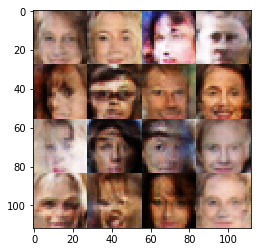

Epoch 1/1  Discriminator Loss: 0.3815 Generator Loss: 3.0638
Epoch 1/1  Discriminator Loss: 0.4008 Generator Loss: 2.7431
Epoch 1/1  Discriminator Loss: 0.3895 Generator Loss: 3.0257
Epoch 1/1  Discriminator Loss: 0.3854 Generator Loss: 3.4062
Epoch 1/1  Discriminator Loss: 0.3965 Generator Loss: 2.8502
Epoch 1/1  Discriminator Loss: 0.3848 Generator Loss: 3.1614
Epoch 1/1  Discriminator Loss: 0.4122 Generator Loss: 2.5750
Epoch 1/1  Discriminator Loss: 0.4026 Generator Loss: 2.7810
Epoch 1/1  Discriminator Loss: 0.3879 Generator Loss: 2.9749
Epoch 1/1  Discriminator Loss: 0.4044 Generator Loss: 2.6578


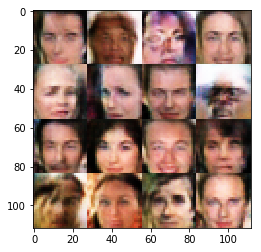

Epoch 1/1  Discriminator Loss: 0.3934 Generator Loss: 2.8994
Epoch 1/1  Discriminator Loss: 0.3892 Generator Loss: 2.9610
Epoch 1/1  Discriminator Loss: 0.3876 Generator Loss: 3.1880
Epoch 1/1  Discriminator Loss: 0.3833 Generator Loss: 3.0407
Epoch 1/1  Discriminator Loss: 0.3974 Generator Loss: 2.8413
Epoch 1/1  Discriminator Loss: 0.3999 Generator Loss: 2.7832
Epoch 1/1  Discriminator Loss: 0.4016 Generator Loss: 2.9442
Epoch 1/1  Discriminator Loss: 0.3947 Generator Loss: 2.8512
Epoch 1/1  Discriminator Loss: 0.3937 Generator Loss: 3.4808
Epoch 1/1  Discriminator Loss: 0.3897 Generator Loss: 3.3968


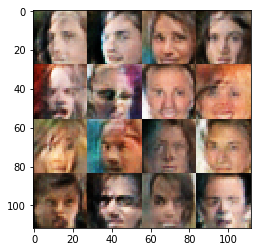

Epoch 1/1  Discriminator Loss: 0.3932 Generator Loss: 2.9935
Epoch 1/1  Discriminator Loss: 0.3965 Generator Loss: 3.5475
Epoch 1/1  Discriminator Loss: 0.3981 Generator Loss: 2.8079
Epoch 1/1  Discriminator Loss: 0.3964 Generator Loss: 2.8503
Epoch 1/1  Discriminator Loss: 0.3896 Generator Loss: 3.7439
Epoch 1/1  Discriminator Loss: 0.3872 Generator Loss: 3.0068
Epoch 1/1  Discriminator Loss: 0.3888 Generator Loss: 2.9530
Epoch 1/1  Discriminator Loss: 0.3914 Generator Loss: 3.0049
Epoch 1/1  Discriminator Loss: 0.4111 Generator Loss: 2.5950
Epoch 1/1  Discriminator Loss: 0.3830 Generator Loss: 3.3382


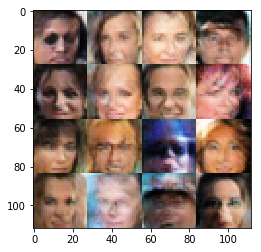

Epoch 1/1  Discriminator Loss: 0.4037 Generator Loss: 2.7315
Epoch 1/1  Discriminator Loss: 0.3953 Generator Loss: 2.8635
Epoch 1/1  Discriminator Loss: 0.3986 Generator Loss: 2.7526
Epoch 1/1  Discriminator Loss: 0.3868 Generator Loss: 3.0249
Epoch 1/1  Discriminator Loss: 0.3961 Generator Loss: 2.8809
Epoch 1/1  Discriminator Loss: 0.3891 Generator Loss: 3.0480
Epoch 1/1  Discriminator Loss: 0.3849 Generator Loss: 3.0289
Epoch 1/1  Discriminator Loss: 0.4010 Generator Loss: 2.6990
Epoch 1/1  Discriminator Loss: 0.3945 Generator Loss: 3.4410
Epoch 1/1  Discriminator Loss: 0.3844 Generator Loss: 3.1348


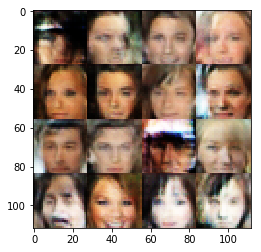

Epoch 1/1  Discriminator Loss: 0.3991 Generator Loss: 2.8359
Epoch 1/1  Discriminator Loss: 0.3920 Generator Loss: 3.3879
Epoch 1/1  Discriminator Loss: 0.3861 Generator Loss: 3.2938
Epoch 1/1  Discriminator Loss: 0.4167 Generator Loss: 2.5369
Epoch 1/1  Discriminator Loss: 0.3912 Generator Loss: 3.3262
Epoch 1/1  Discriminator Loss: 0.3813 Generator Loss: 3.2048
Epoch 1/1  Discriminator Loss: 0.3972 Generator Loss: 2.8688
Epoch 1/1  Discriminator Loss: 0.3873 Generator Loss: 3.0239
Epoch 1/1  Discriminator Loss: 0.3957 Generator Loss: 3.0072
Epoch 1/1  Discriminator Loss: 0.4108 Generator Loss: 2.6035


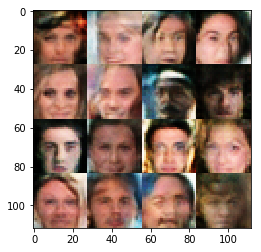

Epoch 1/1  Discriminator Loss: 0.3795 Generator Loss: 3.1917
Epoch 1/1  Discriminator Loss: 0.3975 Generator Loss: 2.8163
Epoch 1/1  Discriminator Loss: 0.3865 Generator Loss: 3.0865
Epoch 1/1  Discriminator Loss: 0.3939 Generator Loss: 3.0210
Epoch 1/1  Discriminator Loss: 0.3971 Generator Loss: 2.7975
Epoch 1/1  Discriminator Loss: 0.3802 Generator Loss: 3.3300
Epoch 1/1  Discriminator Loss: 0.3909 Generator Loss: 3.1021
Epoch 1/1  Discriminator Loss: 0.3988 Generator Loss: 2.7646
Epoch 1/1  Discriminator Loss: 0.3842 Generator Loss: 3.0003
Epoch 1/1  Discriminator Loss: 0.3899 Generator Loss: 2.9429


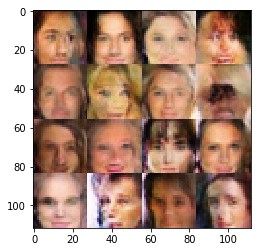

Epoch 1/1  Discriminator Loss: 0.3837 Generator Loss: 3.1856
Epoch 1/1  Discriminator Loss: 0.3872 Generator Loss: 3.0345
Epoch 1/1  Discriminator Loss: 0.3856 Generator Loss: 3.0030
Epoch 1/1  Discriminator Loss: 0.3913 Generator Loss: 3.0777
Epoch 1/1  Discriminator Loss: 0.4012 Generator Loss: 3.3462
Epoch 1/1  Discriminator Loss: 0.3923 Generator Loss: 2.9228
Epoch 1/1  Discriminator Loss: 0.3882 Generator Loss: 3.0835
Epoch 1/1  Discriminator Loss: 0.3868 Generator Loss: 3.1213
Epoch 1/1  Discriminator Loss: 0.4014 Generator Loss: 2.6995
Epoch 1/1  Discriminator Loss: 0.3912 Generator Loss: 3.4585


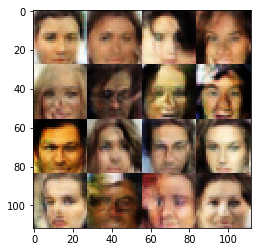

Epoch 1/1  Discriminator Loss: 0.3917 Generator Loss: 2.8652
Epoch 1/1  Discriminator Loss: 0.3988 Generator Loss: 2.7621
Epoch 1/1  Discriminator Loss: 0.3927 Generator Loss: 3.0089
Epoch 1/1  Discriminator Loss: 0.3965 Generator Loss: 2.8775
Epoch 1/1  Discriminator Loss: 0.3947 Generator Loss: 3.0492
Epoch 1/1  Discriminator Loss: 0.3909 Generator Loss: 2.8415
Epoch 1/1  Discriminator Loss: 0.3875 Generator Loss: 3.7859
Epoch 1/1  Discriminator Loss: 0.3815 Generator Loss: 3.0729
Epoch 1/1  Discriminator Loss: 0.3920 Generator Loss: 3.4547
Epoch 1/1  Discriminator Loss: 0.3906 Generator Loss: 2.9327


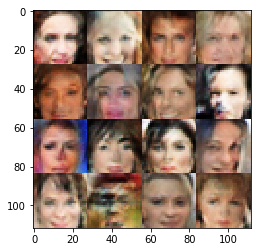

Epoch 1/1  Discriminator Loss: 0.3911 Generator Loss: 2.9055
Epoch 1/1  Discriminator Loss: 0.4064 Generator Loss: 2.6606
Epoch 1/1  Discriminator Loss: 0.3977 Generator Loss: 2.7504
Epoch 1/1  Discriminator Loss: 0.3835 Generator Loss: 3.0574
Epoch 1/1  Discriminator Loss: 0.3918 Generator Loss: 3.2708
Epoch 1/1  Discriminator Loss: 0.3924 Generator Loss: 2.9400
Epoch 1/1  Discriminator Loss: 0.3956 Generator Loss: 2.8988
Epoch 1/1  Discriminator Loss: 0.3856 Generator Loss: 3.3355
Epoch 1/1  Discriminator Loss: 0.3956 Generator Loss: 2.9218
Epoch 1/1  Discriminator Loss: 0.3826 Generator Loss: 3.2040


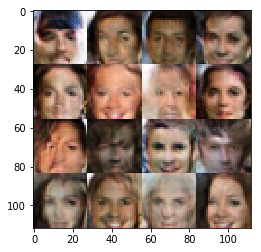

Epoch 1/1  Discriminator Loss: 0.3776 Generator Loss: 3.1463
Epoch 1/1  Discriminator Loss: 0.3959 Generator Loss: 2.8623
Epoch 1/1  Discriminator Loss: 0.3843 Generator Loss: 3.2656
Epoch 1/1  Discriminator Loss: 0.4013 Generator Loss: 2.7797
Epoch 1/1  Discriminator Loss: 0.3871 Generator Loss: 3.0198
Epoch 1/1  Discriminator Loss: 0.3963 Generator Loss: 2.7855
Epoch 1/1  Discriminator Loss: 0.3762 Generator Loss: 3.2332
Epoch 1/1  Discriminator Loss: 0.3824 Generator Loss: 3.0820
Epoch 1/1  Discriminator Loss: 0.3882 Generator Loss: 3.4924
Epoch 1/1  Discriminator Loss: 0.3852 Generator Loss: 3.2036


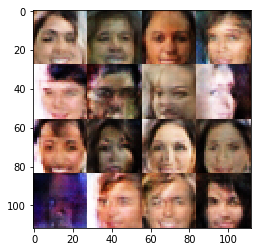

Epoch 1/1  Discriminator Loss: 0.3876 Generator Loss: 3.0844
Epoch 1/1  Discriminator Loss: 0.3851 Generator Loss: 3.1330
Epoch 1/1  Discriminator Loss: 0.4145 Generator Loss: 2.5606
Epoch 1/1  Discriminator Loss: 0.3843 Generator Loss: 3.1000
Epoch 1/1  Discriminator Loss: 0.3875 Generator Loss: 2.9123
Epoch 1/1  Discriminator Loss: 0.3842 Generator Loss: 3.0059
Epoch 1/1  Discriminator Loss: 0.4055 Generator Loss: 3.4158
Epoch 1/1  Discriminator Loss: 0.3863 Generator Loss: 3.0908
Epoch 1/1  Discriminator Loss: 0.3866 Generator Loss: 3.1586
Epoch 1/1  Discriminator Loss: 0.3887 Generator Loss: 3.1550


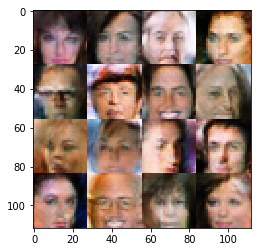

Epoch 1/1  Discriminator Loss: 0.3750 Generator Loss: 3.3968
Epoch 1/1  Discriminator Loss: 0.3838 Generator Loss: 3.0732
Epoch 1/1  Discriminator Loss: 0.3774 Generator Loss: 3.2038
Epoch 1/1  Discriminator Loss: 0.3809 Generator Loss: 3.6833
Epoch 1/1  Discriminator Loss: 0.3749 Generator Loss: 3.3714
Epoch 1/1  Discriminator Loss: 0.3854 Generator Loss: 3.3496
Epoch 1/1  Discriminator Loss: 0.3958 Generator Loss: 2.9028
Epoch 1/1  Discriminator Loss: 0.3904 Generator Loss: 3.0214
Epoch 1/1  Discriminator Loss: 0.3936 Generator Loss: 2.9328
Epoch 1/1  Discriminator Loss: 0.3873 Generator Loss: 3.0577


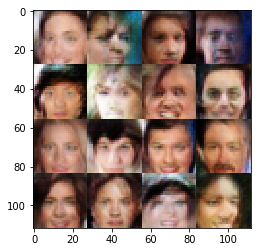

Epoch 1/1  Discriminator Loss: 0.3929 Generator Loss: 2.9441
Epoch 1/1  Discriminator Loss: 0.3979 Generator Loss: 2.9948
Epoch 1/1  Discriminator Loss: 0.3973 Generator Loss: 2.8204
Epoch 1/1  Discriminator Loss: 0.3914 Generator Loss: 2.8579
Epoch 1/1  Discriminator Loss: 0.3846 Generator Loss: 2.9969
Epoch 1/1  Discriminator Loss: 0.3927 Generator Loss: 3.0148
Epoch 1/1  Discriminator Loss: 0.3873 Generator Loss: 3.1122
Epoch 1/1  Discriminator Loss: 0.3927 Generator Loss: 3.0053
Epoch 1/1  Discriminator Loss: 0.3988 Generator Loss: 2.8624
Epoch 1/1  Discriminator Loss: 0.3904 Generator Loss: 3.0403


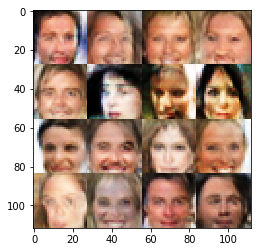

Epoch 1/1  Discriminator Loss: 0.3839 Generator Loss: 3.1309
Epoch 1/1  Discriminator Loss: 0.3903 Generator Loss: 3.0302
Epoch 1/1  Discriminator Loss: 0.3894 Generator Loss: 2.9198
Epoch 1/1  Discriminator Loss: 0.3905 Generator Loss: 3.1127
Epoch 1/1  Discriminator Loss: 0.4044 Generator Loss: 2.6562
Epoch 1/1  Discriminator Loss: 0.3829 Generator Loss: 3.2584
Epoch 1/1  Discriminator Loss: 0.3962 Generator Loss: 2.8247
Epoch 1/1  Discriminator Loss: 0.3923 Generator Loss: 3.0774
Epoch 1/1  Discriminator Loss: 0.3804 Generator Loss: 3.2206
Epoch 1/1  Discriminator Loss: 0.3846 Generator Loss: 3.1571


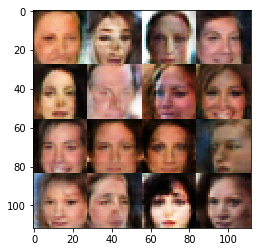

Epoch 1/1  Discriminator Loss: 0.3952 Generator Loss: 2.8581
Epoch 1/1  Discriminator Loss: 0.3982 Generator Loss: 2.7364
Epoch 1/1  Discriminator Loss: 0.3938 Generator Loss: 2.9336
Epoch 1/1  Discriminator Loss: 0.3922 Generator Loss: 2.9485
Epoch 1/1  Discriminator Loss: 0.3781 Generator Loss: 3.2739
Epoch 1/1  Discriminator Loss: 0.3932 Generator Loss: 2.9050
Epoch 1/1  Discriminator Loss: 0.3895 Generator Loss: 2.8840
Epoch 1/1  Discriminator Loss: 0.3881 Generator Loss: 3.0106
Epoch 1/1  Discriminator Loss: 0.3801 Generator Loss: 3.1639
Epoch 1/1  Discriminator Loss: 0.3827 Generator Loss: 3.0218


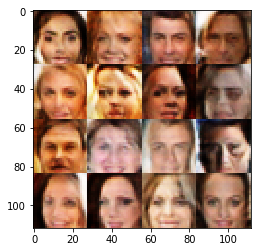

Epoch 1/1  Discriminator Loss: 0.3984 Generator Loss: 2.8040
Epoch 1/1  Discriminator Loss: 0.3768 Generator Loss: 3.5544
Epoch 1/1  Discriminator Loss: 0.3910 Generator Loss: 3.1993
Epoch 1/1  Discriminator Loss: 0.3955 Generator Loss: 2.8775


In [289]:
batch_size = 32
z_dim = 100
learning_rate = 0.0008
beta1 = 0.5




"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)




### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.